# **Unsupervised Learning Practice Project: Fantasy Sports Clustering Analysis**

--------------------------------
## **Context**
-------------------------------

Fantasy sports are online gaming platforms where participants draft and manage virtual teams of real professional sports players. Based on the performance of the players in the real world, players are allotted points in the fantasy sports platform every match. The objective is to create the best possible team with a fixed budget to score maximum fantasy points, and users compete against each other over an entire sports league or season. Some of these fantasy sports require actual financial investments for participation, with the chances of winning monetary rewards as well as free matchday tickets on a periodic basis.

The fantasy sports market has seen tremendous growth over the past few years, with a valuation of \\$18.6 billion in 2019. The football (soccer) segment led in terms of market share in 2019, with over 8 million participants worldwide, and is expected to retain its dominance over the next couple of years. Digitalization is one of the primary factors driving the growth of the fantasy sports market as it allows participants the opportunity to compete on a global level and test their skills. With an increase in smartphone usage and availability of fantasy sports apps, this market is expected to witness a globe surge and reach a \\$48.6 billion valuation by 2027.


----------------------------
## **Objective**
-----------------------------

OnSports is a fantasy sports platform that has fantasy leagues for many different sports and has witnessed an increasing number of participants globally over the past 5 years. For each player, a price is set at the start, and the price keeps changing over time based on the performance of the players in the real world. With the new English Premier League season about to start, they have collected data from the past season and want to analyze it to determine the price of each player for the start of the new season. OnSports have hired you as a data scientist and asked you to conduct a cluster analysis to identify players of different potentials of each player based on previous season performance. This will help them understand the patterns in player performances and fantasy returns and decide the exact price to be set for each player for the upcoming football season.

--------------------------
## **Data Description**
--------------------------

- **Player_Name:** Name of the player.
- **Club:** Club in which the player plays.
- **Position:** Position in which the player plays.
- **Goals_Scored:** Number of goals scored by the player in the previous season.
- **Assists:** Number of passes made by the player leading to goals in the previous season.
- **Total_Points:** Total number of fantasy points scored by the player in the previous season.
- **Minutes:** Number of minutes played by the player in the previous season.
- **Goals_Conceded:** Number of goals conceded by the player in the previous season.
- **Creativity:** A score, computed using a range of stats, that assesses player performance in terms of producing goalscoring opportunities for other players.
- **Influence:** A score, computed using a range of stats, that evaluates a player's impact on a match, taking into account actions that could directly or indirectly affect the match outcome.
- **Threat:** A score, computed using a range of stats, that gauges players who are most likely to score goals.
- **Bonus:** Total bonus points received. The three best performing players in each match receive additional bonus points based on a score computed using a range of stats. 3 points are awarded to the highest scoring player, 2 to the second best, and 1 to the third.
- **Clean_Sheets:** Number of matches without conceding a goal in the previous season.

## **Importing the necessary libraries and overview of the dataset**

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
!pip install scikit-learn-extra

In [ ]:
# Analysis libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removing limits for # of displayed columns
pd.set_option("display.max_columns", None)

# Setting limits for # of displayed rows
pd.set_option("display.max_rows", 200)

# For z-score scaling
from sklearn.preprocessing import StandardScaler

# Computing distances
from scipy.spatial.distance import cdist, pdist

# PCA
from sklearn.decomposition import PCA

# For K-means clustering and silhouette scoring
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For K-Medoids in case we don't get a solution from k-means
from sklearn_extra.cluster import KMedoids

# For DBSCAN and Gaussian Mixture
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# For hierarchical clustering, computing cophenetic correlation, and creating dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Getting project dataframe
df = pd.read_csv('/content/drive/MyDrive/MIT/Course 2/Week 3/Fantasy Sports ML Project/fpl_data.csv')

In [ ]:
# Observing data shape
df.shape

df

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Ruben Vinagre,Wolverhampton Wanderers,Defender,0,0,1,172,7,25.3,31.2,0,0,0
472,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,0,0,132,3330,51,0.0,763.6,0,12,10
473,Vitor Ferreira,Wolverhampton Wanderers,Midfielder,0,1,26,509,8,179.0,80.0,72,0,0
474,Willian Jose,Wolverhampton Wanderers,Forward,1,1,40,1106,13,165.9,89.6,256,3,5


In [ ]:
# Observing a random sample of the data
df.sample(n = 10, random_state = 1)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
441,Mark Noble,West Ham United,Midfielder,0,0,27,701,15,88.6,80.4,7,0,0
363,Sean Longstaff,Newcastle United,Midfielder,0,1,41,1405,26,182.8,179.2,148,1,2
31,Anwar El Ghazi,Aston Villa,Midfielder,10,0,111,1604,22,426.1,500.4,726,13,5
132,Olivier Giroud,Chelsea,Forward,4,0,47,740,5,112.0,161.4,403,6,4
90,Chris Wood,Burnley,Forward,12,3,138,2741,43,323.2,595.8,1129,16,9
249,Vontae Daley-Campbell,Leicester City,Defender,0,0,0,0,0,0.0,0.0,0,0,0
65,Danny Welbeck,Brighton and Hove Albion,Forward,6,4,89,1541,18,269.7,319.8,595,15,6
445,Ryan Fredericks,West Ham United,Defender,1,1,28,564,9,166.8,155.2,96,0,1
117,Christian Pulisic,Chelsea,Midfielder,4,3,82,1731,21,378.8,361.4,724,3,7
415,Ryan Sessegnon,Tottenham Hotspurs,Defender,0,0,0,0,0,0.0,0.0,0,0,0


In [ ]:
# Checking the column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


In [ ]:
# Copying the data to another variable to avoid changes to original data
df2 = df.copy()

In [ ]:
# Checking for dupes
df2.duplicated().value_counts()

False    476
dtype: int64

In [ ]:
# Checking for missing values in the data
df2.isnull().value_counts()

Player_Name  Club   Position  Goals_Scored  Assists  Total_Points  Minutes  Goals_Conceded  Creativity  Influence  Threat  Bonus  Clean_Sheets
False        False  False     False         False    False         False    False           False       False      False   False  False           476
dtype: int64

## **Exploratory Data Analysis**

**Let's check the statistical summary of the data**

In [ ]:
# Summarizing for observation
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Goals_Scored,476.0,1.907563,3.455562,0.0,0.00,0.50,2.00,23.0
Assists,476.0,1.752101,2.708563,0.0,0.00,0.00,2.00,14.0
Total_Points,476.0,58.516807,51.293559,0.0,10.00,48.00,94.25,244.0
Minutes,476.0,1336.909664,1073.773995,0.0,268.75,1269.50,2256.25,3420.0
Goals_Conceded,476.0,19.157563,15.946171,0.0,4.00,18.00,31.00,68.0
Creativity,476.0,195.976050,251.478541,0.0,8.30,96.95,296.95,1414.9
Influence,476.0,294.617647,267.779681,0.0,46.50,233.10,499.50,1318.2
Threat,476.0,224.962185,318.240377,0.0,5.75,104.50,298.25,1980.0
Bonus,476.0,4.718487,6.252625,0.0,0.00,2.00,7.00,40.0
Clean_Sheets,476.0,4.745798,4.394312,0.0,0.00,4.00,8.00,19.0


**Observations and Insights:**
- High standard deviation in Minutes implies higher variance between playing time between players. I'd be curious to see the relationship between this and Influence.
- Every player tends to allow more goals than they score.
- The designation between an average vs elite scorer exists beyond the 75% percentile of players.
- Creativity, Threat, and Bonus will likely provide insight into players' ability to maximize scoring.

### **Univariate Analysis**

In [ ]:
# Function to plot a boxplot and a histogram along the same scale


def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):

    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Selecting # of rows of the subplot grid = 2
        sharex = True,  # Sharing x axis between plots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

**`Goals_Scored`**

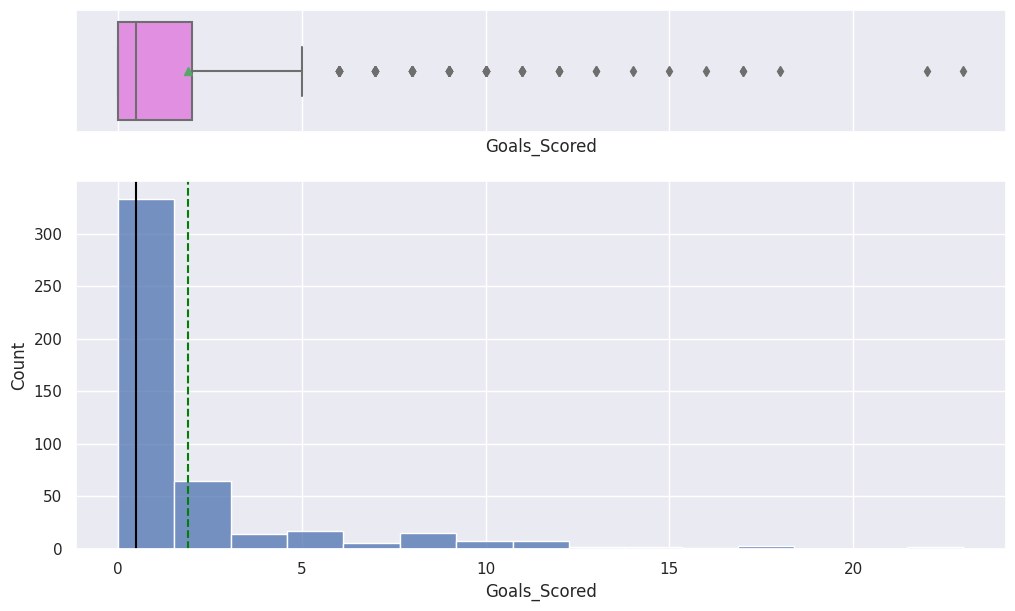

In [ ]:
histogram_boxplot(df2, 'Goals_Scored', bins = 15)

**`Assists`**

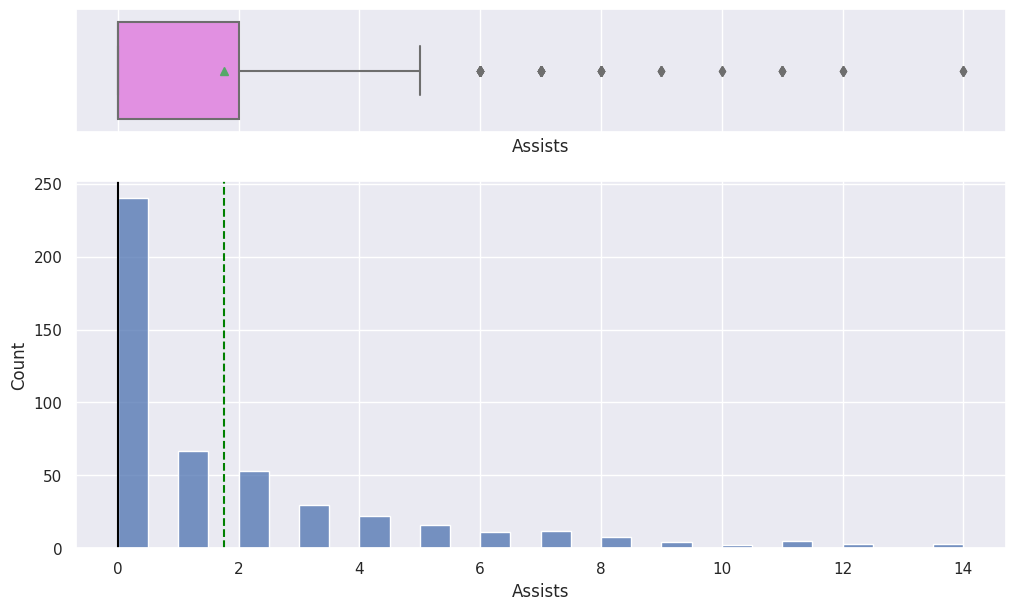

In [ ]:
histogram_boxplot(df2, 'Assists')  # Complete the code to create histogram_boxplot for 'Assists'

**`Goals Conceded`**

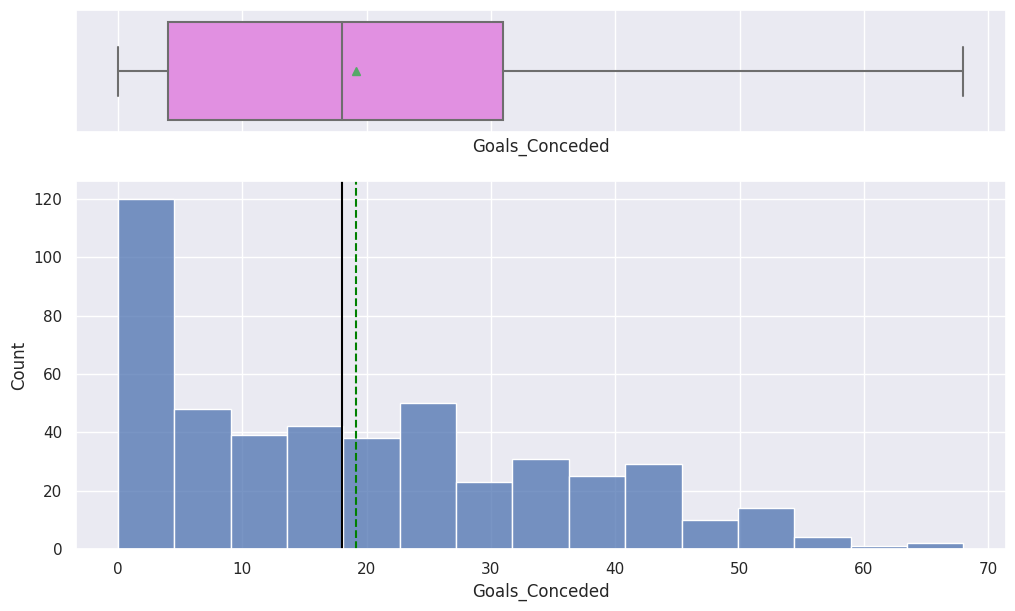

In [ ]:
histogram_boxplot(df2, 'Goals_Conceded', bins = 15)

**`Clean Sheets`**

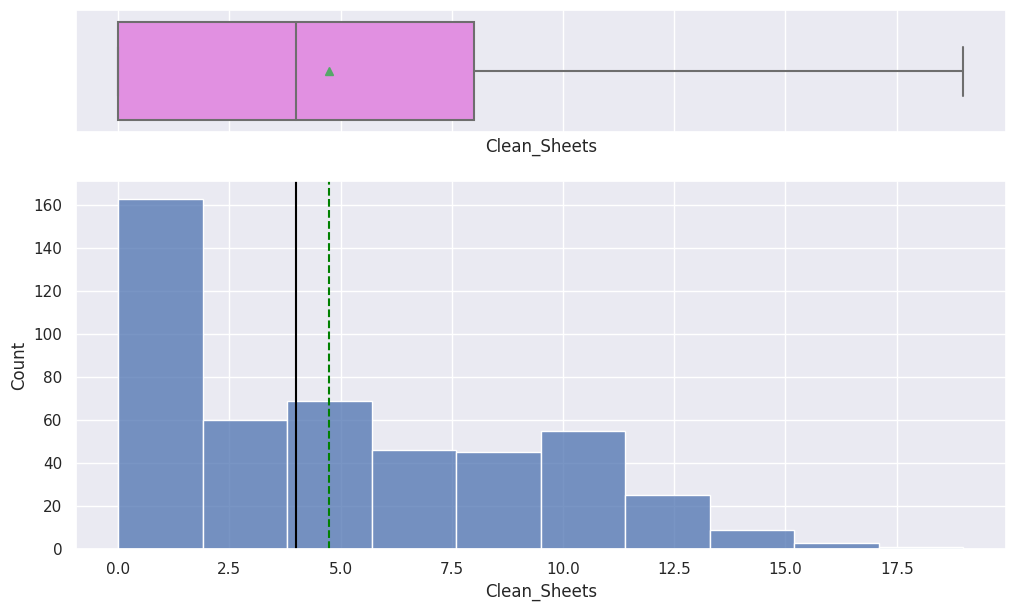

In [ ]:
histogram_boxplot(df2, 'Clean_Sheets')

**`Minutes`**

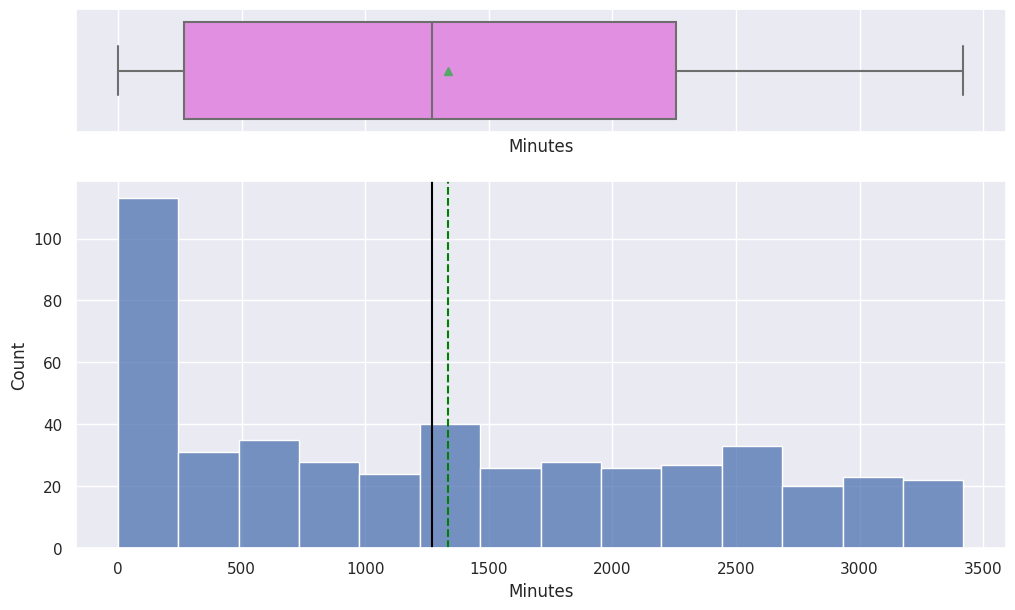

In [ ]:
histogram_boxplot(df2, 'Minutes', bins = 14)

**`Total Points`**

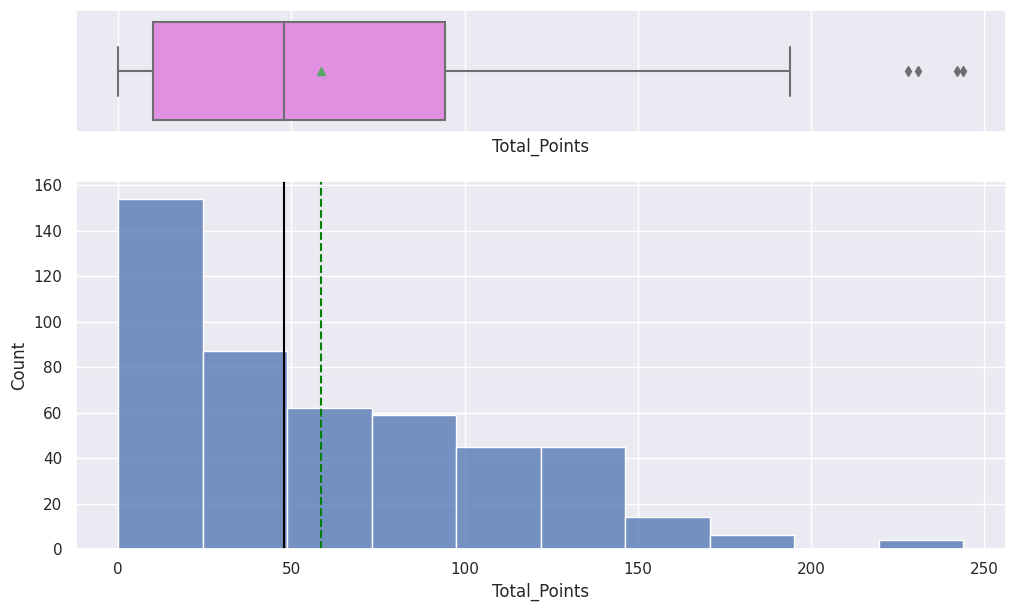

In [ ]:
histogram_boxplot(df2, 'Total_Points', bins = 10)

**`Creativity`**

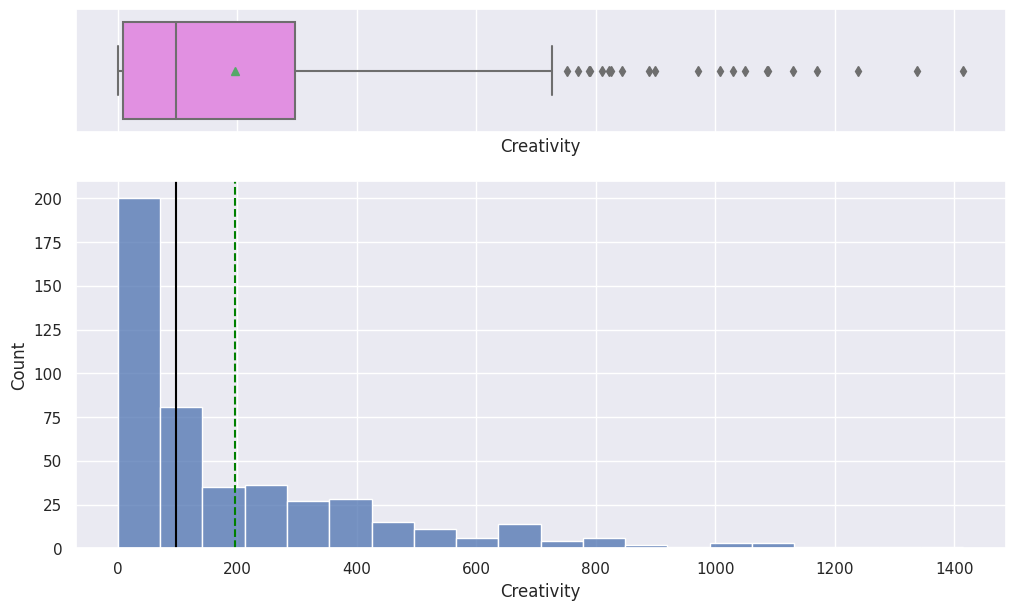

In [ ]:
histogram_boxplot(df2, 'Creativity')

**`Influence`**

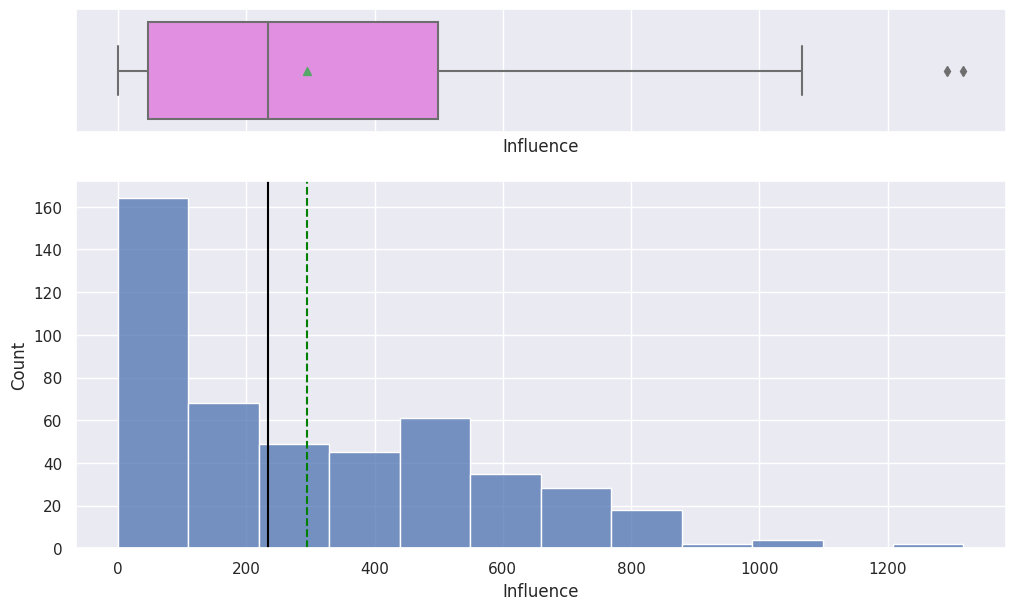

In [ ]:
histogram_boxplot(df2, 'Influence')

**`Threat`**

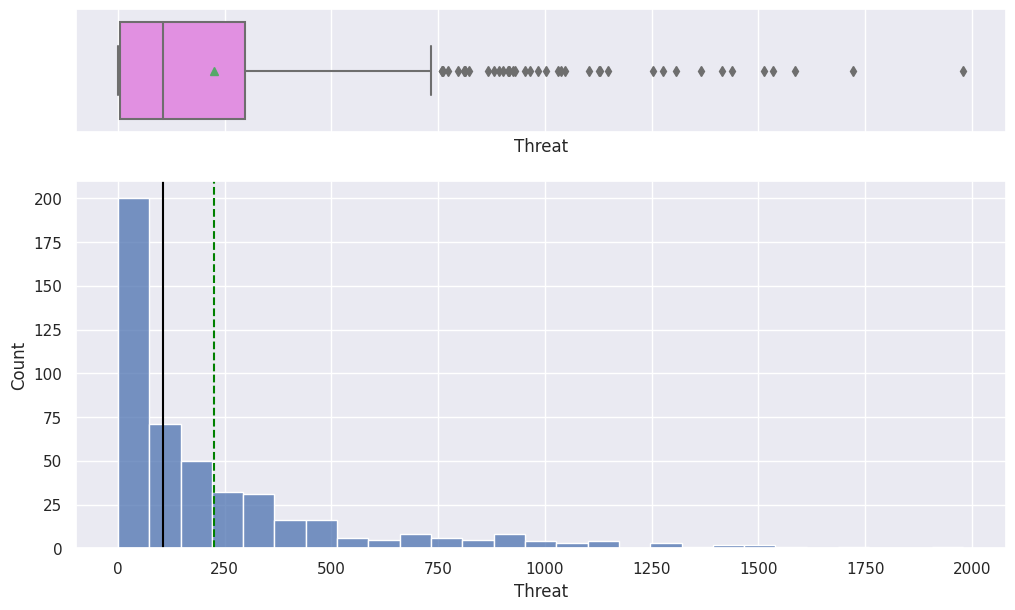

In [ ]:
histogram_boxplot(df2, 'Threat')

**`Bonus`**

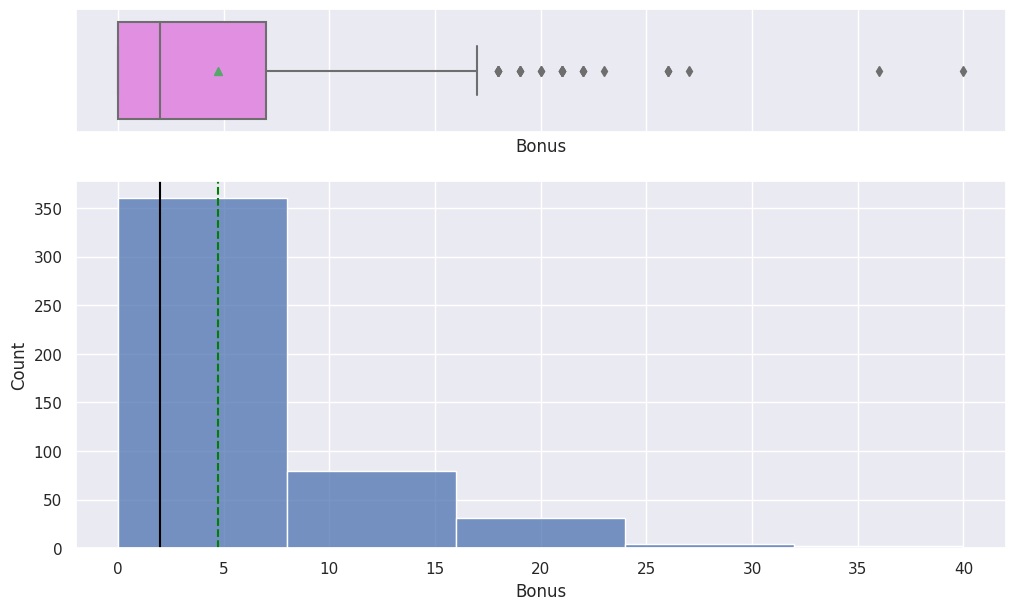

In [ ]:
histogram_boxplot(df2, 'Bonus', bins = 5)

**Observations and Insights for all the plots:**
- The majority of players scored 0-5 goals.
- Most players had little to no assists.
- Every non-goalie player appears to have allowed an average of 15-20 goals last season.
- It is rare for any player to go more than 10 matches without allowing a goal.
- The number of players getting 0 minutes of playing team appears to drag the mean below the median playing time among active players.
- More than 50% of players fell below the average and median fantasy points scored.
- Creativity can likely be reflected by the team's makeup, as the right skew likely points to fact that only a handful of players on each team would be considered creative by designation (e.g, maybe there are only 2 creative forwards playing regularly vs 9 other positions that are active but rely on fundamentals and tactics for success).
- Individual players don't generally have much impact on match outcomes, which likely ties back to what positions they play, as only a 2-3/11 players typically are in a scoring position.
- Similar to Influence, few players score well in the Threat category--likely an additional symptom of the position they're playing in and the lack of balance in overall players they score within their respective playing times.
- It is rare than any bonuses are awarded due to the high standard for the alignment of top 3 player stats within the same team.

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

**`Club`**

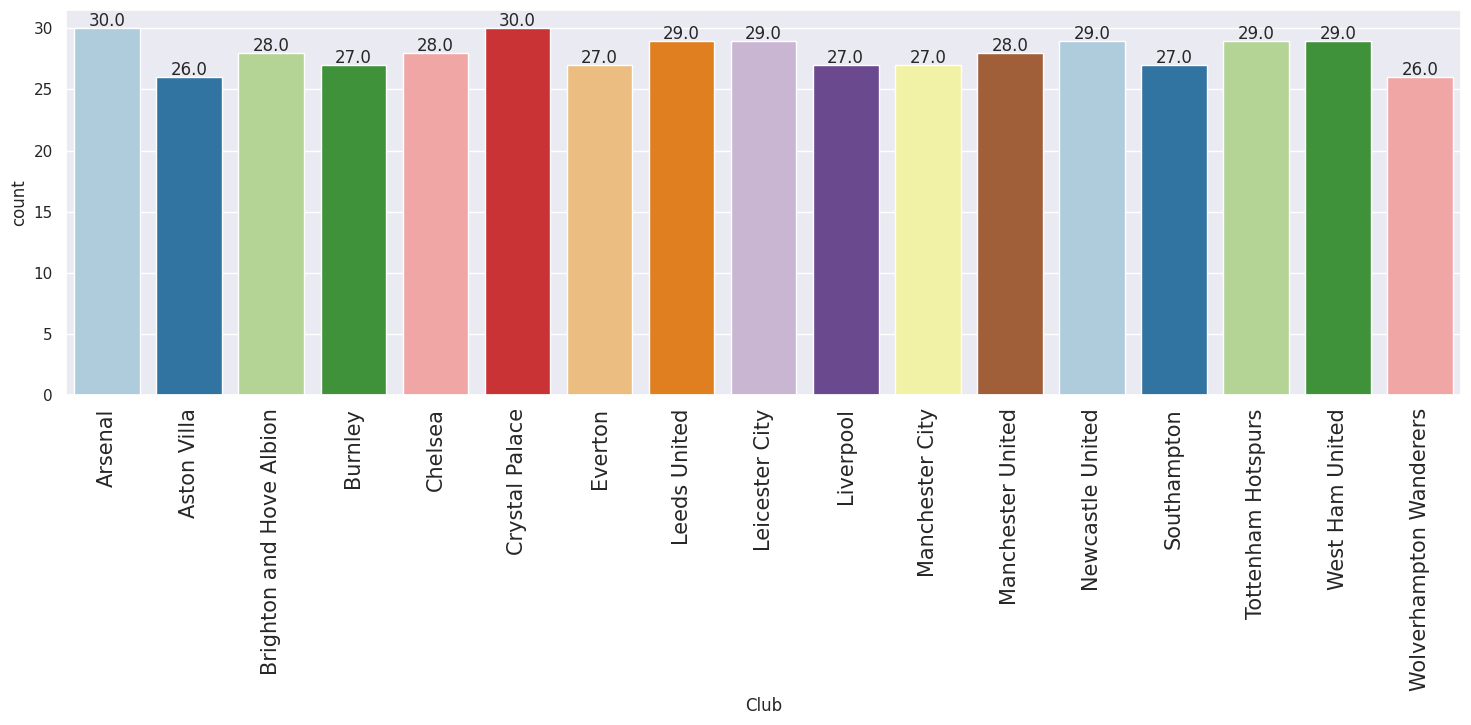

In [ ]:
labeled_barplot(df2, 'Club')

**`Position`**

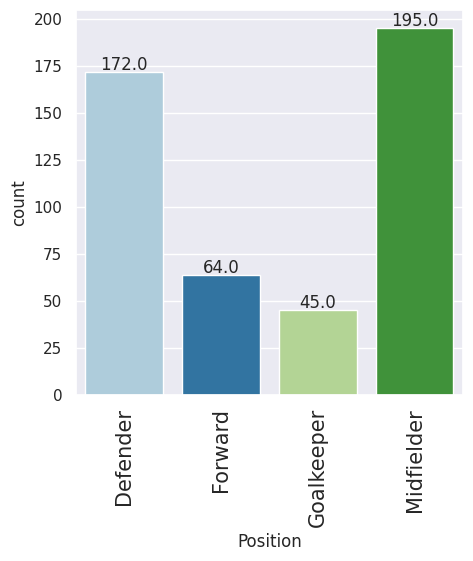

In [ ]:
labeled_barplot(df2, 'Position')

**Observations and Insights:**
- The distribution of players among clubs ranges from 26 to 30. This indicates a fairly normal distribution.
- Midfielders and Defenders make up the majority of teams which, depending on tactics, may explain the skewedness amongst metrics like Total Points, Threat, Influence, and other factors more geared toward Forwards or that wouldn't include Goalkeepers (which would create a outlier that impacts the mean).

### **Bivariate Analysis**

**We are done with univariate analysis. Let's explore the data a bit more with bivariate analysis.**

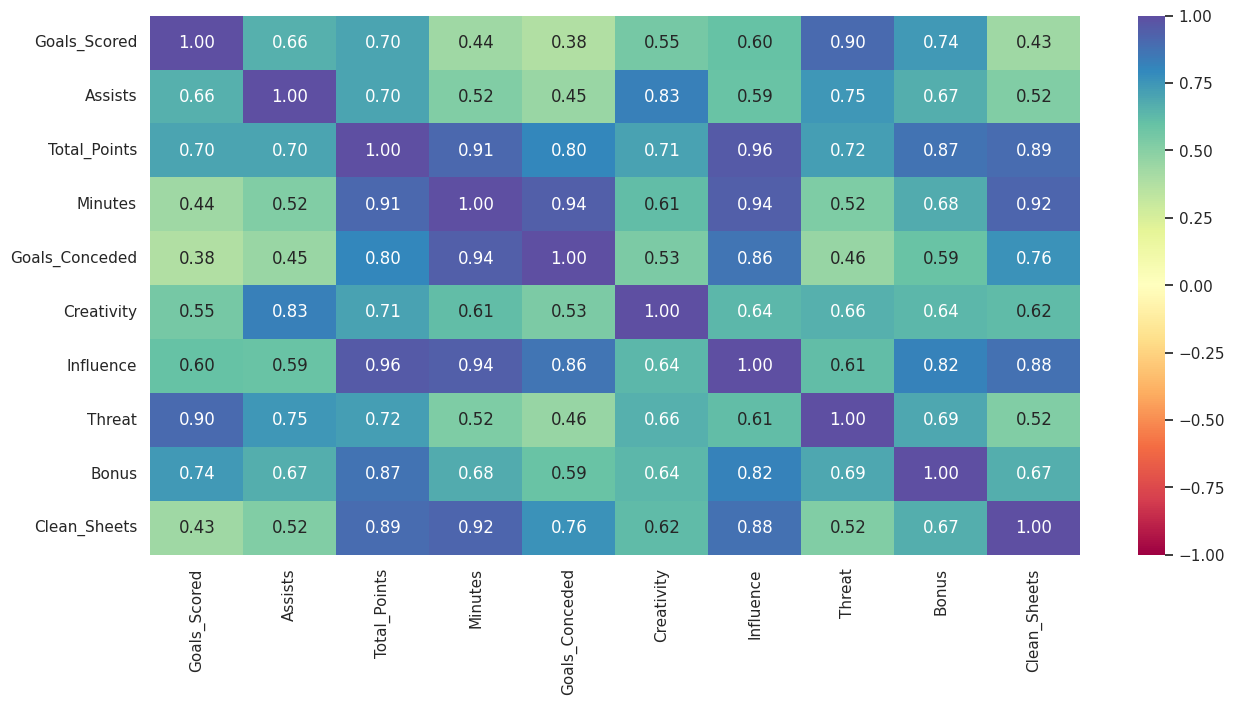

In [ ]:
# Correlation check
cols_list = df2.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 7))

sns.heatmap(
    df2[cols_list].corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)

plt.show()

**Observations and Insights:**
- Total Points and Minutes are highly positively correlated.
- Total Points and Influence are positively correlated.
- Influence and Minutes are positively correlated.
- The data contains no negative correlation relationships.
- Total Points and Bonus are positively correlated.
- Threat is strongly correlated to Goals Scored and Assists.
- Clean Sheets correlates strongly to Influence, Minutes, and Total Points, which makes sense given that the players with the cleanest sheets likely also played the most and played the best.
- Overall, performance-based metrics correlate very strongly to the factors contributing to that performance (goals, assists, goals stopped, influence).

**Let's check players from which team have scored the most fantasy points on average.**

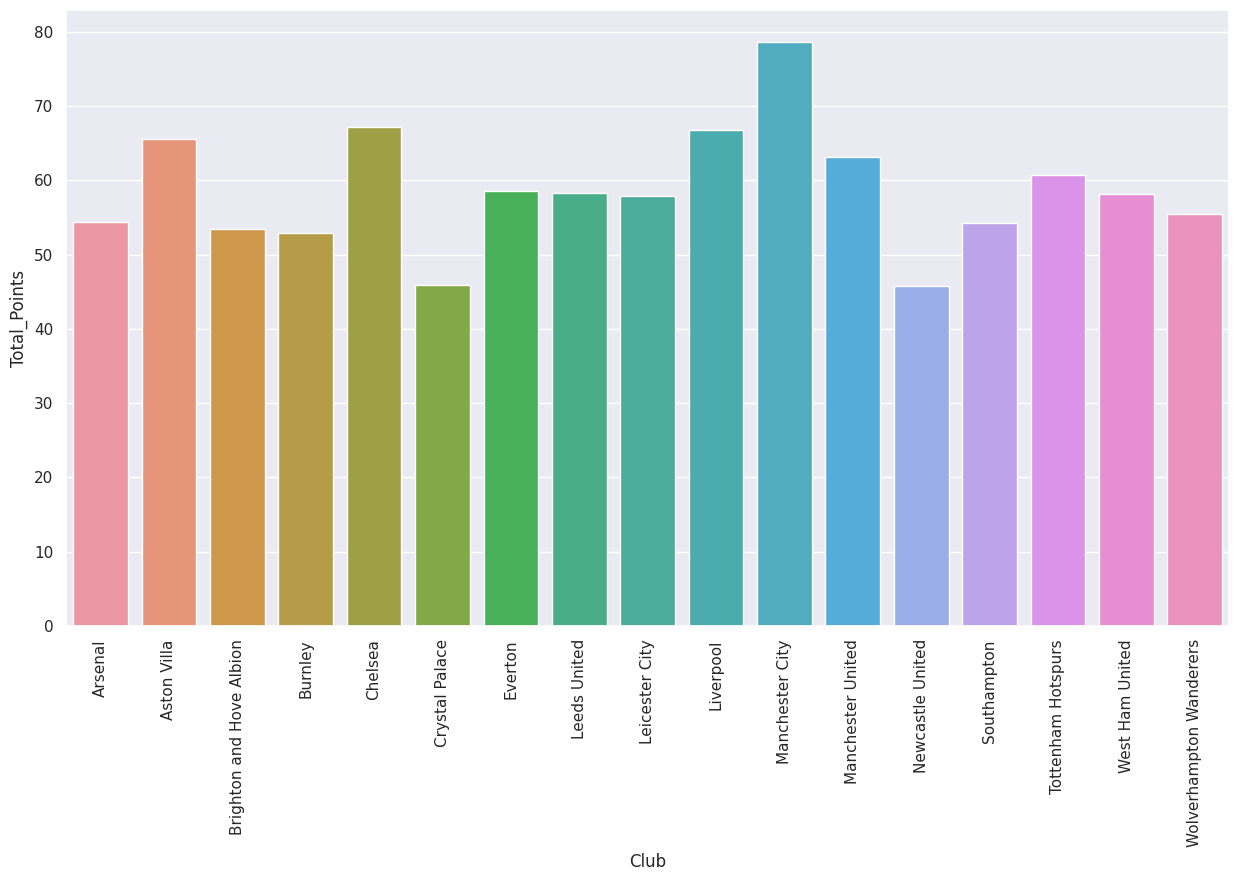

In [ ]:
# Plotting Club to Total Points relationship
plt.figure(figsize = (15, 8))
sns.barplot(data = df2, x = 'Club' , y = "Total_Points" , errorbar = ('ci', False))
plt.xticks(rotation = 90)
plt.show()

**We know that players in different positions have specific roles to play in a team. Let's check players in which positions tend to score more fantasy points on average.**

<Axes: xlabel='Position', ylabel='Total_Points'>

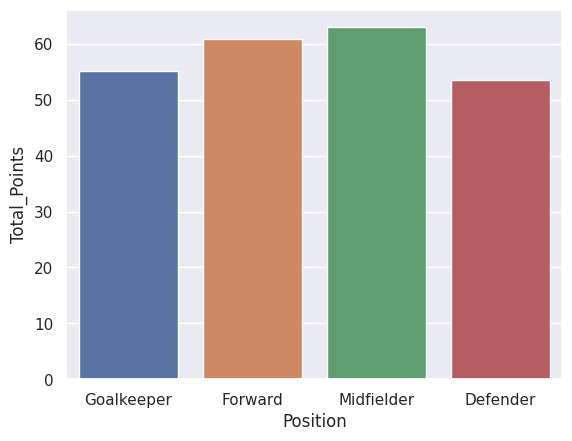

In [ ]:
# Plotting Position to Total Points relationship
sns.barplot(data = df2, x = 'Position' , y = "Total_Points" , errorbar = ('ci', False))

**To effectively utilize their squad depth, managers often rotate the squad to keep key players in shape for tougher games. Let's check the total number of minutes played, on average, across different positions.**

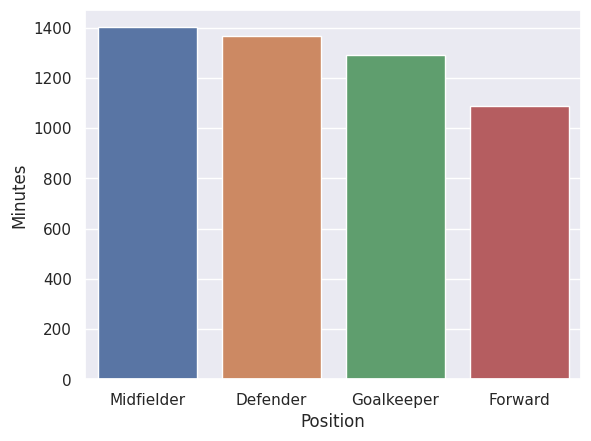

In [ ]:
# Plotting average minutes by position
sns.barplot(data = df2,
            x = 'Position',
            y = 'Minutes', ci = None,
            order = df2.groupby(['Position'])['Minutes'].mean().sort_values(ascending = False).index);

**Every point counts in fantasy sports and getting bonus points for a player is always a treat. Let's check which team's players have secured the most bonus points, on average, last season.**

<Axes: xlabel='Position', ylabel='Bonus'>

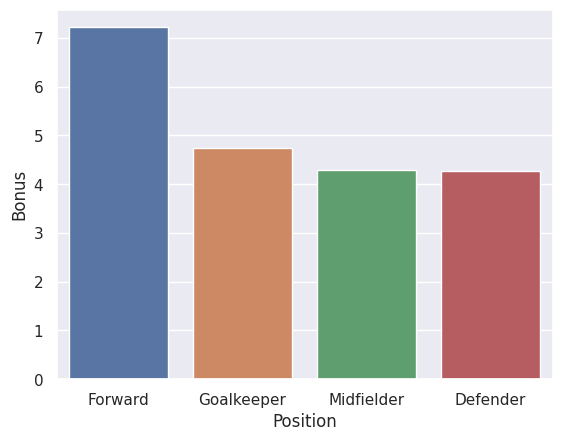

In [ ]:
# Plotting average bonus points by team
sns.barplot(data = df2,
            x = 'Position',
            y = 'Bonus',
            ci = None,
            order = df2.groupby(['Position'])['Bonus'].mean().sort_values(ascending = False).index)

**Let's see which players scored the most fantasy points last season for different positions of play.**

In [ ]:
# Getting top points for each position type
pos_list = df2.Position.unique().tolist()
best_df = pd.DataFrame()

for pos in pos_list:
    df_aux = df2[df2.Position == pos]
    best_df = pd.concat([best_df, df_aux[df_aux.Total_Points == df_aux.Total_Points.max()][['Player_Name', 'Club', 'Position', 'Total_Points']]])

best_df

,Player_Name,Club,Position,Total_Points
36,Emiliano Martinez,Aston Villa,Goalkeeper,186
403,Harry Kane,Tottenham Hotspurs,Forward,242
315,Bruno Fernandes,Manchester United,Midfielder,244
223,Stuart Dallas,Leeds United,Defender,171


**Let's see the top 10 players with the most fantasy points last season for different positions of play.**

In [ ]:
# Getting the top 10 players for each position that has the most points
best10_df = pd.DataFrame()

for pos in pos_list:
    df_aux = df2[df2.Position == pos]
    best10_df = pd.concat([best10_df, df_aux.sort_values('Total_Points', ascending=False).reset_index(drop=True).loc[:10, ['Player_Name', 'Club', 'Position', 'Total_Points']]])

best10_df

,Player_Name,Club,Position,Total_Points
0,Emiliano Martinez,Aston Villa,Goalkeeper,186
1,Ederson Moares,Manchester City,Goalkeeper,160
2,Illan Meslier,Leeds United,Goalkeeper,154
3,Hugo Lloris,Tottenham Hotspurs,Goalkeeper,149
4,Nick Pope,Burnley,Goalkeeper,144
5,Alisson Becker,Liverpool,Goalkeeper,140
6,Edouard Mendy,Chelsea,Goalkeeper,140
7,Lukasz Fabianski,West Ham United,Goalkeeper,133
8,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,132
9,Bernd Leno,Arsenal,Goalkeeper,131


### **Outlier Check**

- Plot the boxplots of all numerical columns to check for outliers.

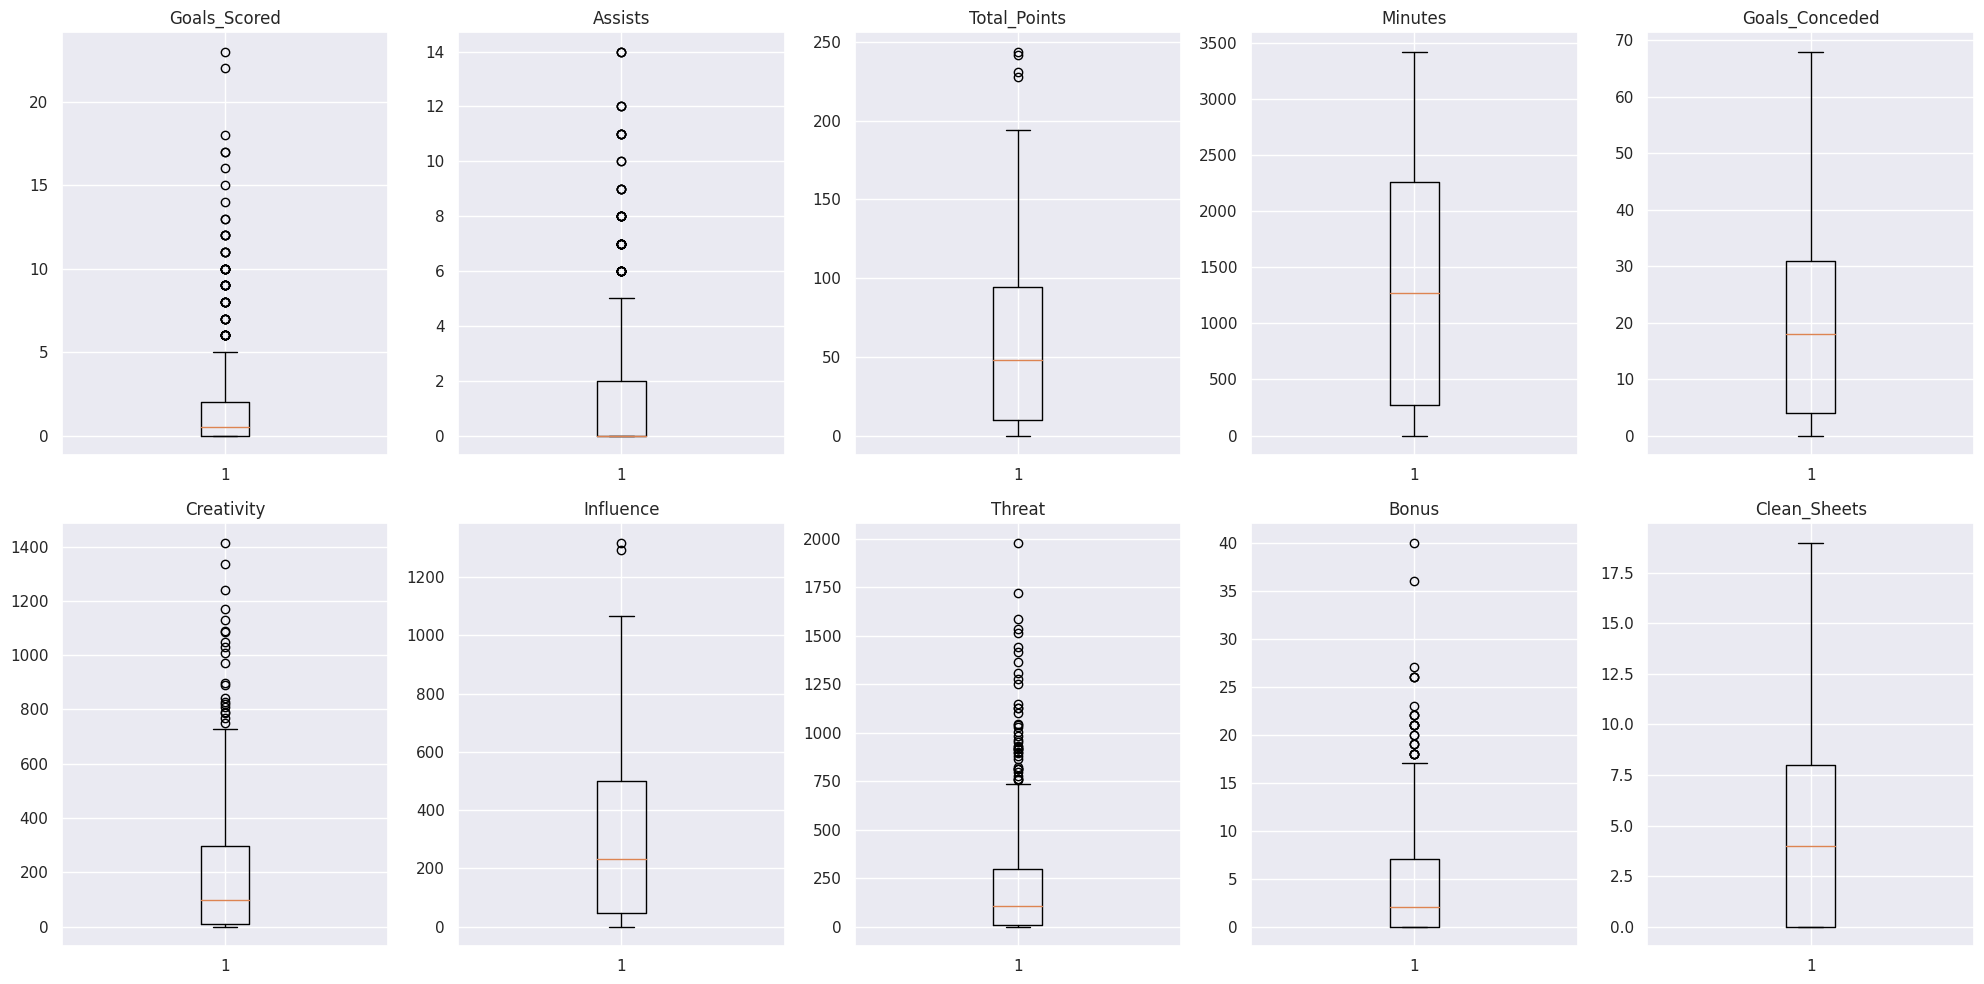

In [ ]:
# Outlier checks
plt.figure(figsize = (20, 10))
numeric_columns = df2.select_dtypes(include = np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(2, 5, i + 1)
    plt.boxplot(df2[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### **Scaling**

- Scale the data before we proceed with clustering.

In [ ]:
# Scaling the data for clustering
scaler = StandardScaler() # Calling StandardScaler
subset = scaler.fit(df2[numeric_columns]) # Fitting to numeric columns since categorical features would otherwise be left out
subset_scaled =  scaler.transform(df2[numeric_columns]) # Establishing as a scaled data set that will be turned into a dataframe

In [ ]:
# Creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns = numeric_columns)

In [ ]:
subset_scaled_df # Reviewing values

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510
...,...,...,...,...,...,...,...,...,...,...
471,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123
472,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940
473,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123
474,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909


### **Applying PCA**


In [ ]:
# Defining the number of principal components to generate
n = subset_scaled_df.shape[1] # Storing the number of variables in the subset data

pca = PCA(n_components = n, random_state = 0) # Initialize PCA with n_components = n and random_state = 1
pca.fit(subset_scaled_df)
pca_data = pd.DataFrame(pca.transform(subset_scaled_df)) # Fit/transform PCA on the scaled data

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_

pca_data # Reviewing dataframe

,0,1,2,3,4,5,6,7,8,9
0,-2.916600,0.569939,-0.041871,0.190663,0.003485,0.008158,-0.042314,0.064757,0.057486,0.006269
1,3.815468,1.999554,-2.216345,0.757341,-0.119000,-0.541975,-0.233941,-0.293053,0.075356,-0.238019
2,1.943396,-2.757446,-0.958238,0.816920,0.041188,0.376978,0.005235,0.138392,-0.306183,-0.136656
3,3.502427,1.043441,0.581995,-0.969567,0.415848,-0.358456,0.661746,0.376272,-0.260200,-0.155934
4,-1.153639,0.422189,0.642307,0.269271,-0.271583,0.405367,-0.033575,0.098886,-0.035234,-0.034877
...,...,...,...,...,...,...,...,...,...,...
471,-2.686929,0.350179,0.012579,-0.028976,-0.226985,-0.079117,-0.016498,-0.025886,0.114191,0.056974
472,2.333559,-3.137873,-1.051056,0.486420,-0.652311,0.294376,0.067490,0.094238,-0.214251,0.007010
473,-1.966630,0.469243,0.474989,-0.098289,-0.221093,-0.163924,-0.057647,0.129321,-0.267969,-0.017272
474,-0.818000,0.180940,0.103096,-0.112637,0.423414,-0.064093,0.399416,-0.300399,-0.000771,-0.068806


## **K-Means Clustering**

In [ ]:
k_means_df = pca_data.copy() # Copying data set to get k-means

Number of Clusters: 1 	Average Distortion: 2.7730371100978024
Number of Clusters: 2 	Average Distortion: 1.8635736785898263
Number of Clusters: 3 	Average Distortion: 1.5612774038101602
Number of Clusters: 4 	Average Distortion: 1.354517182083815
Number of Clusters: 5 	Average Distortion: 1.2931541699741687
Number of Clusters: 6 	Average Distortion: 1.2341231453420072
Number of Clusters: 7 	Average Distortion: 1.1457934035634143
Number of Clusters: 8 	Average Distortion: 1.1153076568890785
Number of Clusters: 9 	Average Distortion: 1.079731047577605
Number of Clusters: 10 	Average Distortion: 1.017436992641063
Number of Clusters: 11 	Average Distortion: 0.9986112688354984
Number of Clusters: 12 	Average Distortion: 0.9862831494790055
Number of Clusters: 13 	Average Distortion: 0.9602766985773115
Number of Clusters: 14 	Average Distortion: 0.9501453167908896


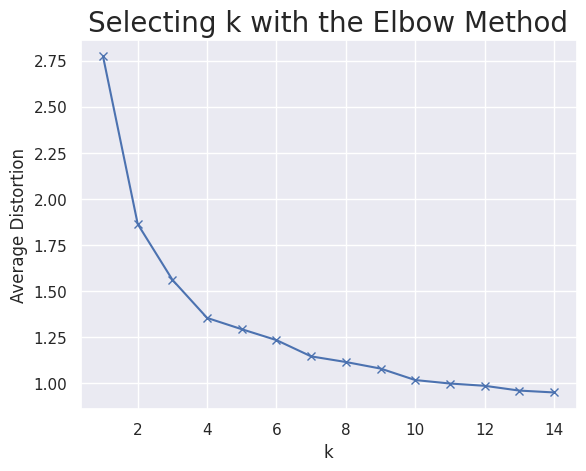

In [ ]:
# K-means elbow analysis
clusters = range(1, 15)
meanDistortions = []

for k in clusters:

    model = KMeans(n_clusters = k, random_state = 1, n_init = "auto")

    model.fit(pca_data)

    prediction = model.predict(k_means_df)

    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis = 1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

# Visualizing k-means
plt.plot(clusters, meanDistortions, "bx-")

plt.xlabel("k")

plt.ylabel("Average Distortion")

plt.title("Selecting k with the Elbow Method", fontsize = 20)

plt.show()

**Observations and Insights:**
- We will move ahead with k = 4. **What can be the reason for the same?**

We would choose 4 clusters because the industry standard is to select the numbered based on the location of the more significant bend a the "elbow".

In [ ]:
# Updating with 4 clusters
kmeans = KMeans(n_clusters = 4, random_state = 1, n_init = "auto") # Creating K-Means with nclusters = 4

kmeans.fit(k_means_df)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [ ]:
# Creating a copy of the original data
df3 = df.copy()

# Adding K-Means cluster labels to the K-Means dataframe
k_means_df["KM_segments"] = kmeans.labels_

# Adding K-Means cluster labels to the original dataframe
df3["KM_segments"] = kmeans.labels_

### **Cluster Profiling**

In [ ]:
# Segmenting data by cluster labels
km_cluster_profile = df3.groupby(df3['KM_segments']).mean(numeric_only = True)

km_cluster_profile

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
KM_segments,,,,,,,,,,
0,1.371134,1.783505,103.000000,2674.288660,37.649485,256.951546,579.144330,198.288660,7.463918,9.989691
1,0.148936,0.202128,9.824468,238.750000,3.930851,28.171809,43.164894,30.244681,0.409574,0.558511
2,8.919355,6.709677,141.725806,2458.306452,33.451613,625.253226,661.458065,860.677419,16.322581,9.322581
3,1.503876,1.604651,56.038760,1392.736434,20.573643,188.358915,270.818605,223.255814,3.356589,4.705426


In [ ]:
# Creating the "count_in_each_segment" feature in K-Means cluster profile
km_cluster_profile["count_in_each_segment"] = (
    df3.groupby(df3['KM_segments'])["Total_Points"].count().values)  # Grouping by labels again

km_cluster_profile

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
KM_segments,,,,,,,,,,,
0,1.371134,1.783505,103.000000,2674.288660,37.649485,256.951546,579.144330,198.288660,7.463918,9.989691,97
1,0.148936,0.202128,9.824468,238.750000,3.930851,28.171809,43.164894,30.244681,0.409574,0.558511,188
2,8.919355,6.709677,141.725806,2458.306452,33.451613,625.253226,661.458065,860.677419,16.322581,9.322581,62
3,1.503876,1.604651,56.038760,1392.736434,20.573643,188.358915,270.818605,223.255814,3.356589,4.705426,129


In [ ]:
# Highlighting the maximum average value among all the clusters for each of the variables
km_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
KM_segments,,,,,,,,,,,
0,1.371134,1.783505,103.000000,2674.288660,37.649485,256.951546,579.144330,198.288660,7.463918,9.989691,97
1,0.148936,0.202128,9.824468,238.750000,3.930851,28.171809,43.164894,30.244681,0.409574,0.558511,188
2,8.919355,6.709677,141.725806,2458.306452,33.451613,625.253226,661.458065,860.677419,16.322581,9.322581,62
3,1.503876,1.604651,56.038760,1392.736434,20.573643,188.358915,270.818605,223.255814,3.356589,4.705426,129


In [ ]:
# Printing players from each cluster
for cl in df3['KM_segments'].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df3[df3['KM_segments'] == cl]["Player_Name"].unique())
    print()

In cluster 1, the following players are present:
['Alex Runnarsson' 'Cedric Soares' 'Edward Nketiah'
 'Gabriel Teodoro Martinelli Silva' 'Matt Macey' 'Miguel Azeez'
 'Pablo Mari' 'Reiss Nelson' 'Sead Kolasinac' 'Shkodran Mustafi'
 'Sokratis Papastathopoulos' 'William Saliba' 'Ahmed El Mohamady'
 'Carney Chukwuemeka' 'Conor Hourihane' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Keinan Davis'
 'Kortney Hause' 'Marvelous Nakamba' 'Morgan Sanson' 'Orjan Nyland'
 'Wesley Moraes' 'Alireza Jahanbakhsh' 'Andi Zeqiri'
 'Bernardo Fernandes da Silva Junior' 'Davy Propper' 'Jakub Moder'
 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo' 'Percy Tau'
 'Reda Khadra' 'Anthony Driscoll-Glennon' 'Bailey Peacock-Farrell'
 'Dale Stephens' 'Jimmy Dunne' 'Joel Mumbongo' 'Josh Benson' 'Kevin Long'
 'Lewis Richardson' 'Phil Bardsley' 'Will Norris' 'Billy Gilmour'
 'Emerson Palmieri dos Santos' 'Faustino Anjorin' 'Fikayo Tomori'
 'Karlo Ziger' 'Kepa Arrizabalaga' 'Valenti

In [ ]:
df3.groupby(["KM_segments", "Position"])['Player_Name'].count()

KM_segments  Position  
0            Defender      48
             Goalkeeper    17
             Midfielder    32
1            Defender      70
             Forward       28
             Goalkeeper    25
             Midfielder    65
2            Defender       7
             Forward       20
             Midfielder    35
3            Defender      47
             Forward       16
             Goalkeeper     3
             Midfielder    63
Name: Player_Name, dtype: int64

**Let's plot the boxplot**

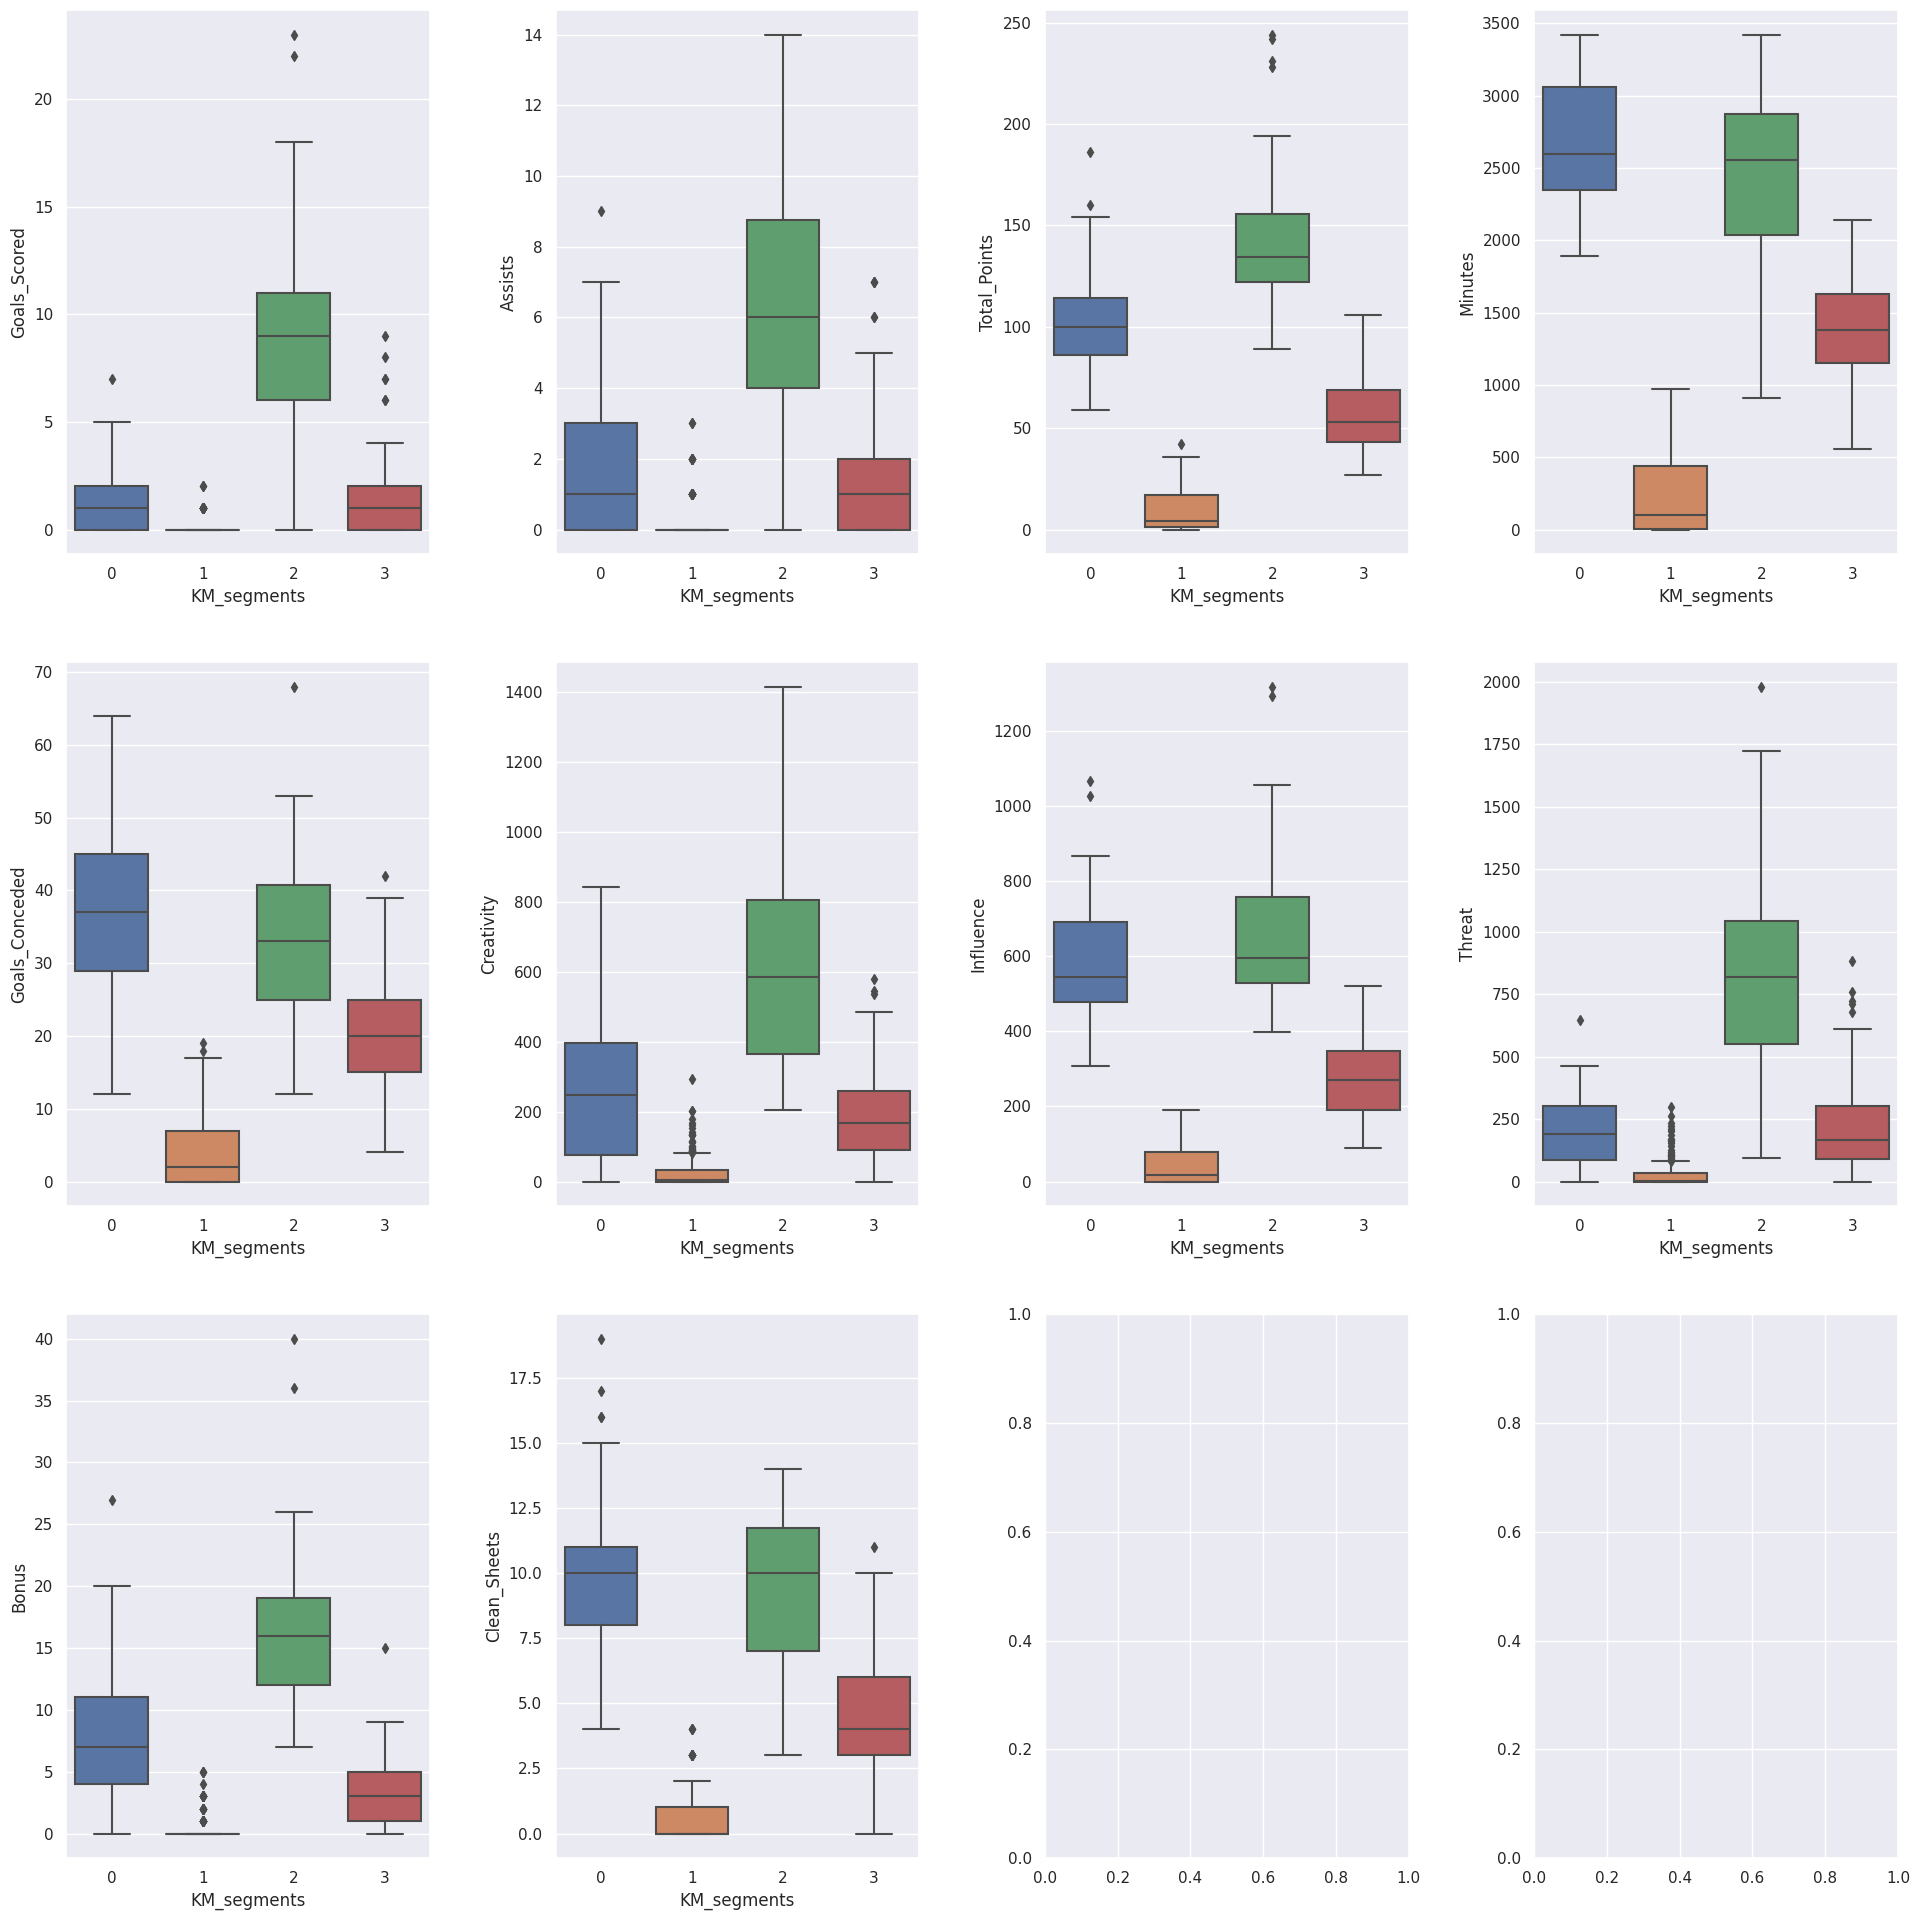

In [ ]:
# Getting boxplot
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df3,
                y = df3.columns[3 + counter],
                x = "KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

### **Characteristics of each cluster:**
- Cluster 3 appears to contain the strongest players, given that sit somewhere between the 50th and 75 percentage of the other clusters in each category.
- Cluster 2 appears to contain the weakest players, given the across-the-board low metrics between categories.
- Cluster 1 looks like it contains the most defenders, given the inverse between goals scored and goals conceded. The low of creativity number also supports this.
- Cluster 4 may contain the most midfielders, as they appear to never be the best while also not being the lowest scoring. This may indicate having a multilayered role that prevent a player from focusing purely on scoring or defending.

## **K-Medoids Clustering**

In [ ]:
# Creating kmedoids dataframe for PAM method to test against k-means
kmed_df = pca_data.copy()

In [ ]:
kmed = KMedoids(n_clusters = 4, random_state = 1) # Creating K-Medoids with nclusters = 4
kmed.fit(kmed_df)

KMedoids(n_clusters=4, random_state=1)

In [ ]:
# Creating a copy of the original data
df4 = df.copy()

# Adding K-Medoids cluster labels to K-Medoids data
kmed_df["KMed_segments"] = kmed.labels_

# Adding K-Medoids cluster labels to original data
df4["KMed_segments"] = kmed.labels_

df4

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,KMed_segments
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0,3
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7,0
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11,1
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8,0
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Ruben Vinagre,Wolverhampton Wanderers,Defender,0,0,1,172,7,25.3,31.2,0,0,0,3
472,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,0,0,132,3330,51,0.0,763.6,0,12,10,1
473,Vitor Ferreira,Wolverhampton Wanderers,Midfielder,0,1,26,509,8,179.0,80.0,72,0,0,3
474,Willian Jose,Wolverhampton Wanderers,Forward,1,1,40,1106,13,165.9,89.6,256,3,5,2


### **Cluster Profiling**

In [ ]:
# Taking the cluster-wide means of all the numeric variables
kmed_profile = df4.groupby(df4['KMed_segments']).mean(numeric_only = True)

kmed_profile

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
KMed_segments,,,,,,,,,,
0,7.512195,6.195122,133.243902,2452.243902,33.853659,602.902439,625.653659,745.402439,14.573171,9.231707
1,1.068966,1.091954,99.528736,2638.195402,36.632184,184.582759,575.818391,166.333333,6.988506,9.931034
2,1.338235,1.558824,51.073529,1270.051471,18.977941,180.458824,242.588235,203.102941,2.904412,4.205882
3,0.099415,0.111111,7.736842,193.187135,3.362573,18.979532,34.188304,22.608187,0.280702,0.385965


In [ ]:
# Creating the "count_in_each_segment" column in K-Medoids cluster profile
kmed_profile['Count_of_Segments'] = (df4.groupby(df4['KMed_segments'])['Total_Points'].count().values)

kmed_profile

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Count_of_Segments
KMed_segments,,,,,,,,,,,
0,7.512195,6.195122,133.243902,2452.243902,33.853659,602.902439,625.653659,745.402439,14.573171,9.231707,82
1,1.068966,1.091954,99.528736,2638.195402,36.632184,184.582759,575.818391,166.333333,6.988506,9.931034,87
2,1.338235,1.558824,51.073529,1270.051471,18.977941,180.458824,242.588235,203.102941,2.904412,4.205882,136
3,0.099415,0.111111,7.736842,193.187135,3.362573,18.979532,34.188304,22.608187,0.280702,0.385965,171


In [ ]:
# Highlighting maximum average value among all the clusters for each of the variables
kmed_profile.style.highlight_max(axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Count_of_Segments
KMed_segments,,,,,,,,,,,
0,7.512195,6.195122,133.243902,2452.243902,33.853659,602.902439,625.653659,745.402439,14.573171,9.231707,82
1,1.068966,1.091954,99.528736,2638.195402,36.632184,184.582759,575.818391,166.333333,6.988506,9.931034,87
2,1.338235,1.558824,51.073529,1270.051471,18.977941,180.458824,242.588235,203.102941,2.904412,4.205882,136
3,0.099415,0.111111,7.736842,193.187135,3.362573,18.979532,34.188304,22.608187,0.280702,0.385965,171


In [ ]:
# Printing players in each cluster
for cl in df4['KMed_segments'].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df4[df4['KMed_segments'] == cl]["Player_Name"].unique())
    print()

In cluster 3, the following players are present:
['Alex Runnarsson' 'Matt Macey' 'Miguel Azeez' 'Reiss Nelson'
 'Sead Kolasinac' 'Shkodran Mustafi' 'Sokratis Papastathopoulos'
 'William Saliba' 'Carney Chukwuemeka' 'Conor Hourihane' 'Henri Lansbury'
 'Jacob Ramsey' 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo'
 'Keinan Davis' 'Kortney Hause' 'Morgan Sanson' 'Orjan Nyland'
 'Wesley Moraes' 'Alireza Jahanbakhsh' 'Andi Zeqiri'
 'Bernardo Fernandes da Silva Junior' 'Davy Propper' 'Jakub Moder'
 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo' 'Percy Tau'
 'Reda Khadra' 'Anthony Driscoll-Glennon' 'Bailey Peacock-Farrell'
 'Dale Stephens' 'Jimmy Dunne' 'Joel Mumbongo' 'Josh Benson' 'Kevin Long'
 'Lewis Richardson' 'Phil Bardsley' 'Will Norris' 'Billy Gilmour'
 'Emerson Palmieri dos Santos' 'Faustino Anjorin' 'Fikayo Tomori'
 'Karlo Ziger' 'Kepa Arrizabalaga' 'Valentino Livramento'
 'Willy Caballero' 'Connor Wickham' 'Jack Butland' 'James McCarthy'
 'James Tomkins' 'Jean-Philippe Mateta' 

**Let's plot the boxplot**

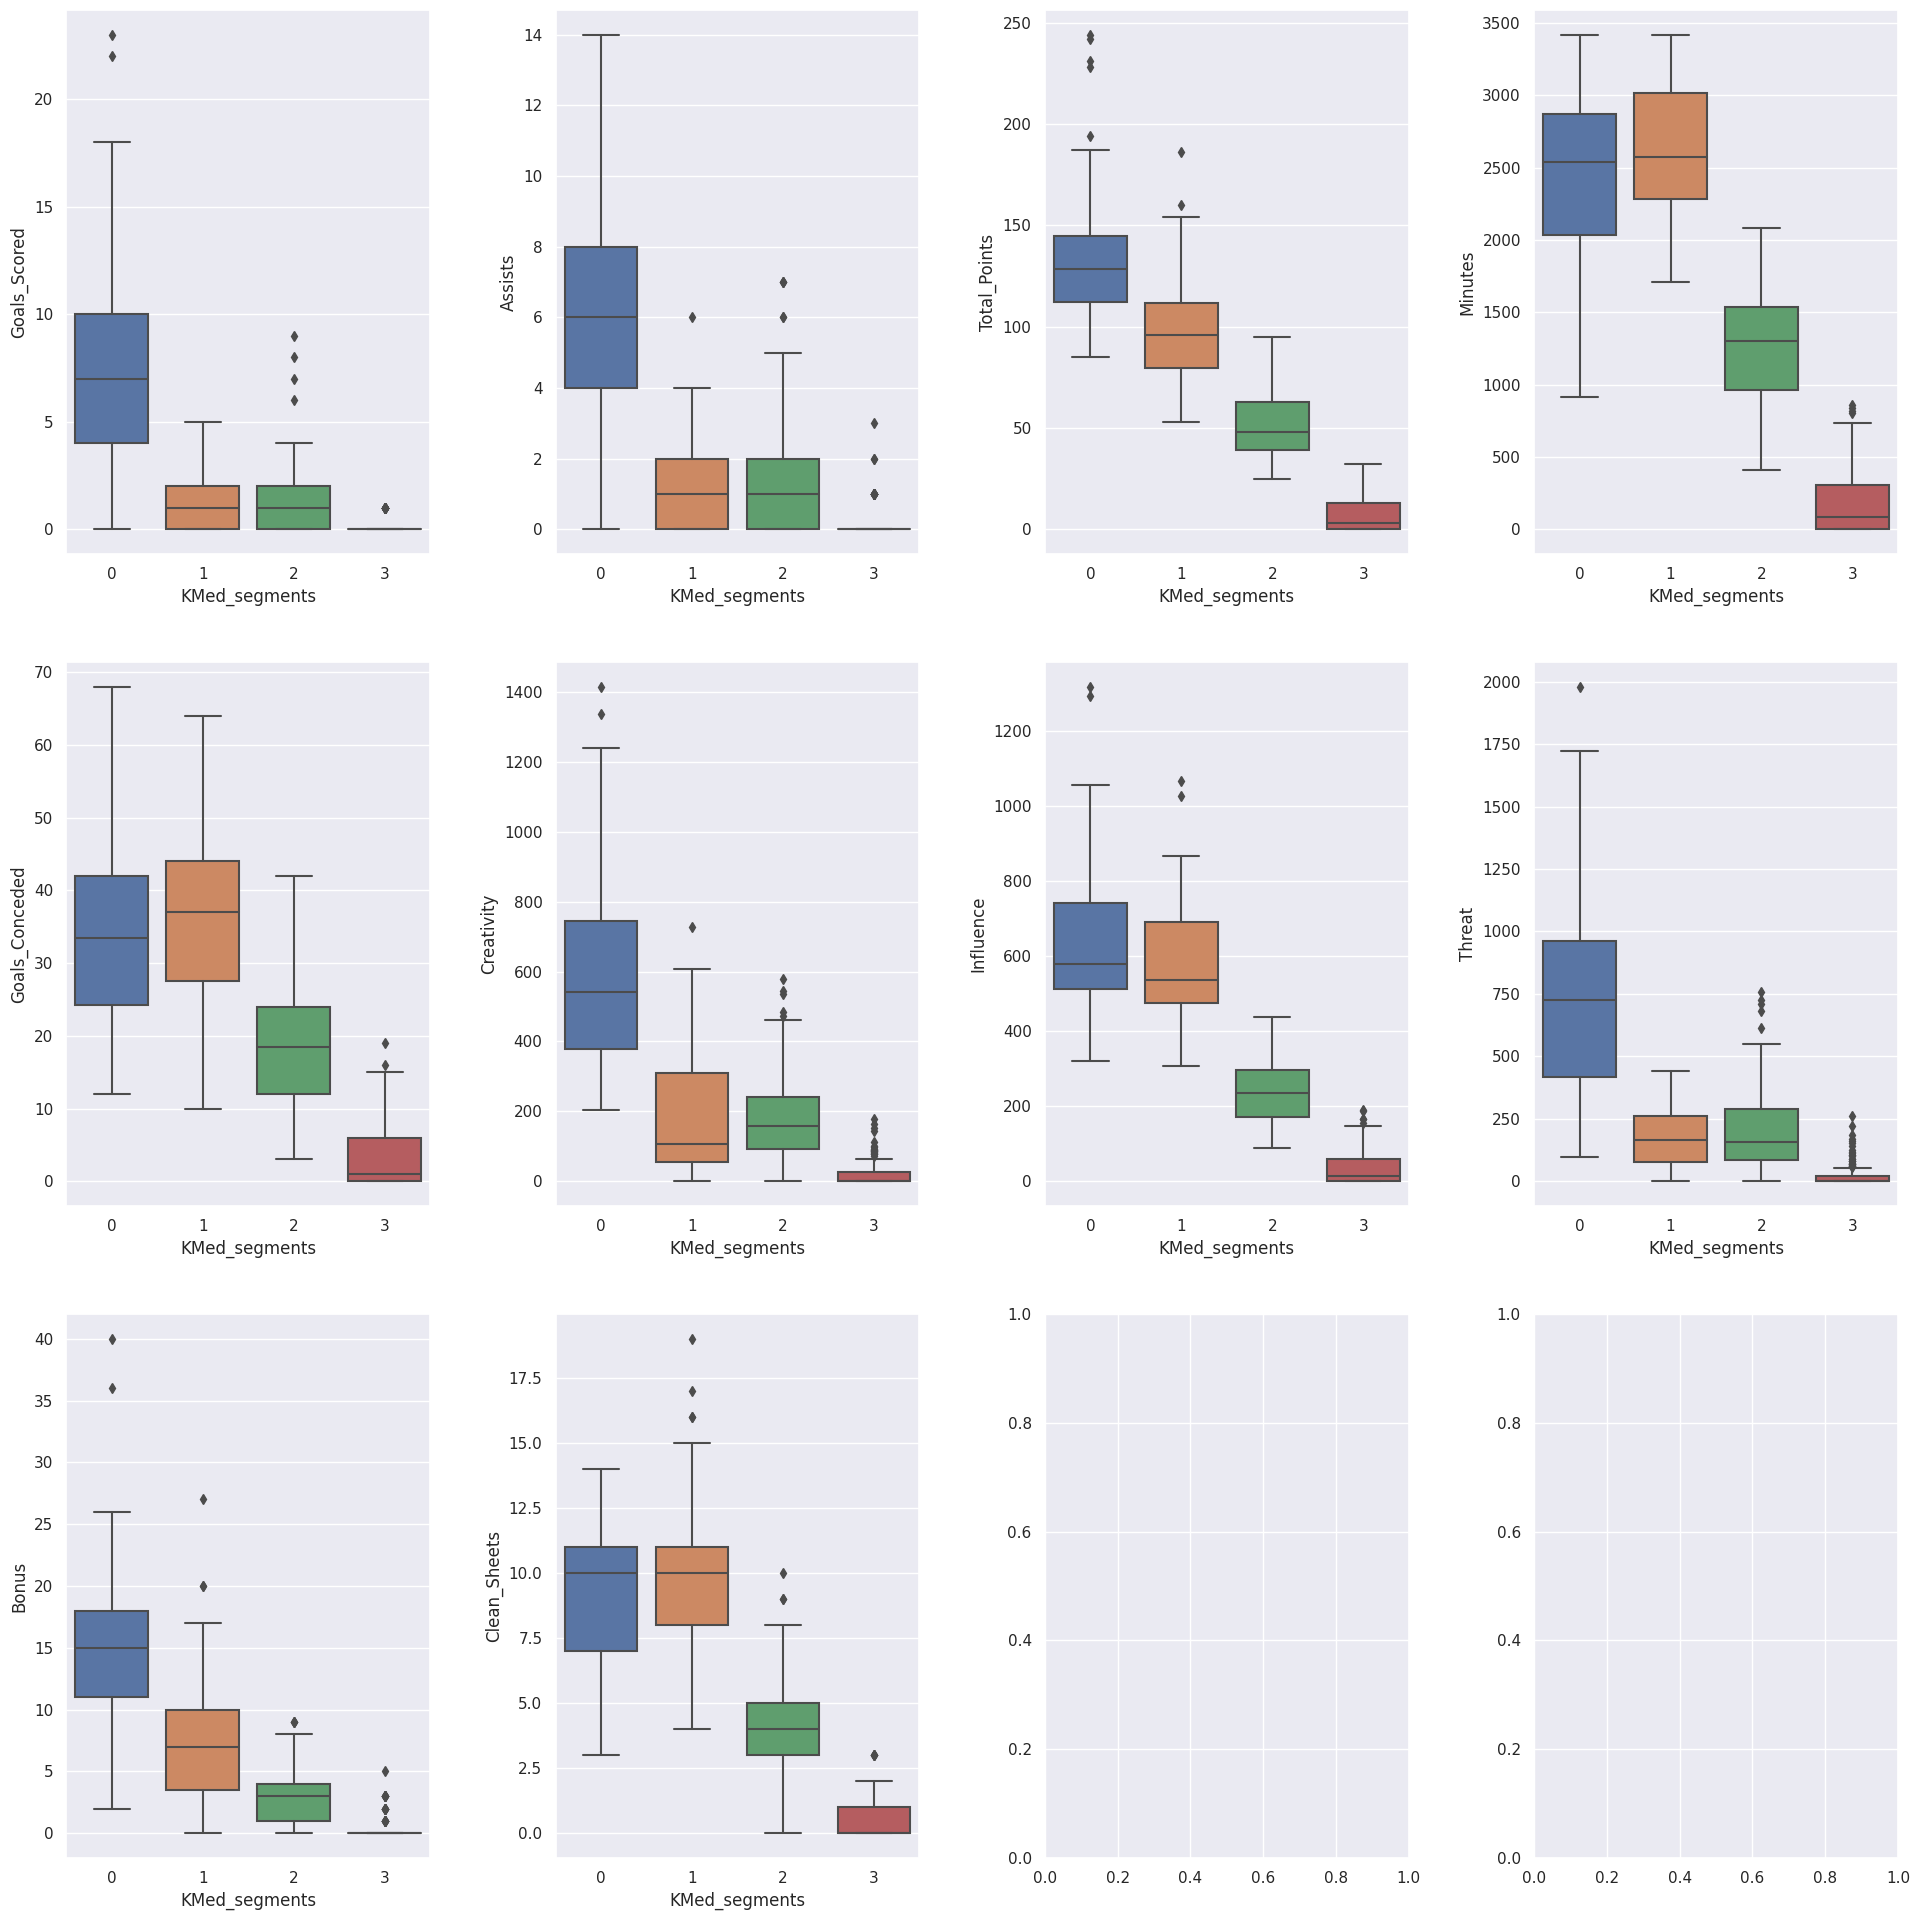

In [ ]:
# Plotting variables for analysis with same features as previous for a fair comparison
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for iii in range(3):
    for jjj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[iii][jjj],
                data = df4,
                y = df4.columns[3 + counter],
                x = "KMed_segments",
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

### **Characteristics of each cluster:**
- First observation is there appears to be a clearer pattern or purpose for clustering between the groups.
- Clearer distinction between player positions and how those positions impact overall fantasy point distribution.
- Evident that goalkeepers were skewing the previous data, as their lack of performance in key areas that earn fantasy points created a number of outliers.

### **Comparison of cluster profiles from K-Means and K-Medoids:**
While K-means helped us to iterate upon initial thoughts on how to iterpret this data, it appears to be quick vulnerable to outliers given that the centroid is based more or less on an educated guess rather than what makes the most statistical sense. This was evident by the way that there wasn't a clear pattern or display of correlation between varied aspects of the clusters.

Once we implemented k-medoid, however, the relationship between the contents of each cluster became a lot clearer and easier to interpet.

##  **Hierarchical Clustering**

In [ ]:
hc_df = pca_data.copy()

In [ ]:
hc_df1 = hc_df.copy()

In [ ]:
# Listing distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# Listing linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df1, metric = dm, method = lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.8430175514228706.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7412041292261757.
Cophenetic correlation for Euclidean distance and average linkage is 0.8476499945585417.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8624581351067482.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8381223141111799.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8028394390632132.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8167064931302256.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8448497876639637.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8065008904132246.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6583135946489014.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7747800632434059.
Cophenetic co

**Explore different linkage methods with Euclidean distance only.**

In [ ]:
# Listing linkage methods while focusing on Euclidean distance
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df1, metric = "euclidean", method = lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.8430175514228706.
Cophenetic correlation for complete linkage is 0.7412041292261757.
Cophenetic correlation for average linkage is 0.8476499945585417.
Cophenetic correlation for centroid linkage is 0.8068296032280465.
Cophenetic correlation for ward linkage is 0.577773844586155.
Cophenetic correlation for weighted linkage is 0.8624581351067482.
****************************************************************************************************
Highest cophenetic correlation is 0.8624581351067482, which is obtained with weighted linkage.


**Review the dendrograms for the different linkage methods with Euclidean distance only.**

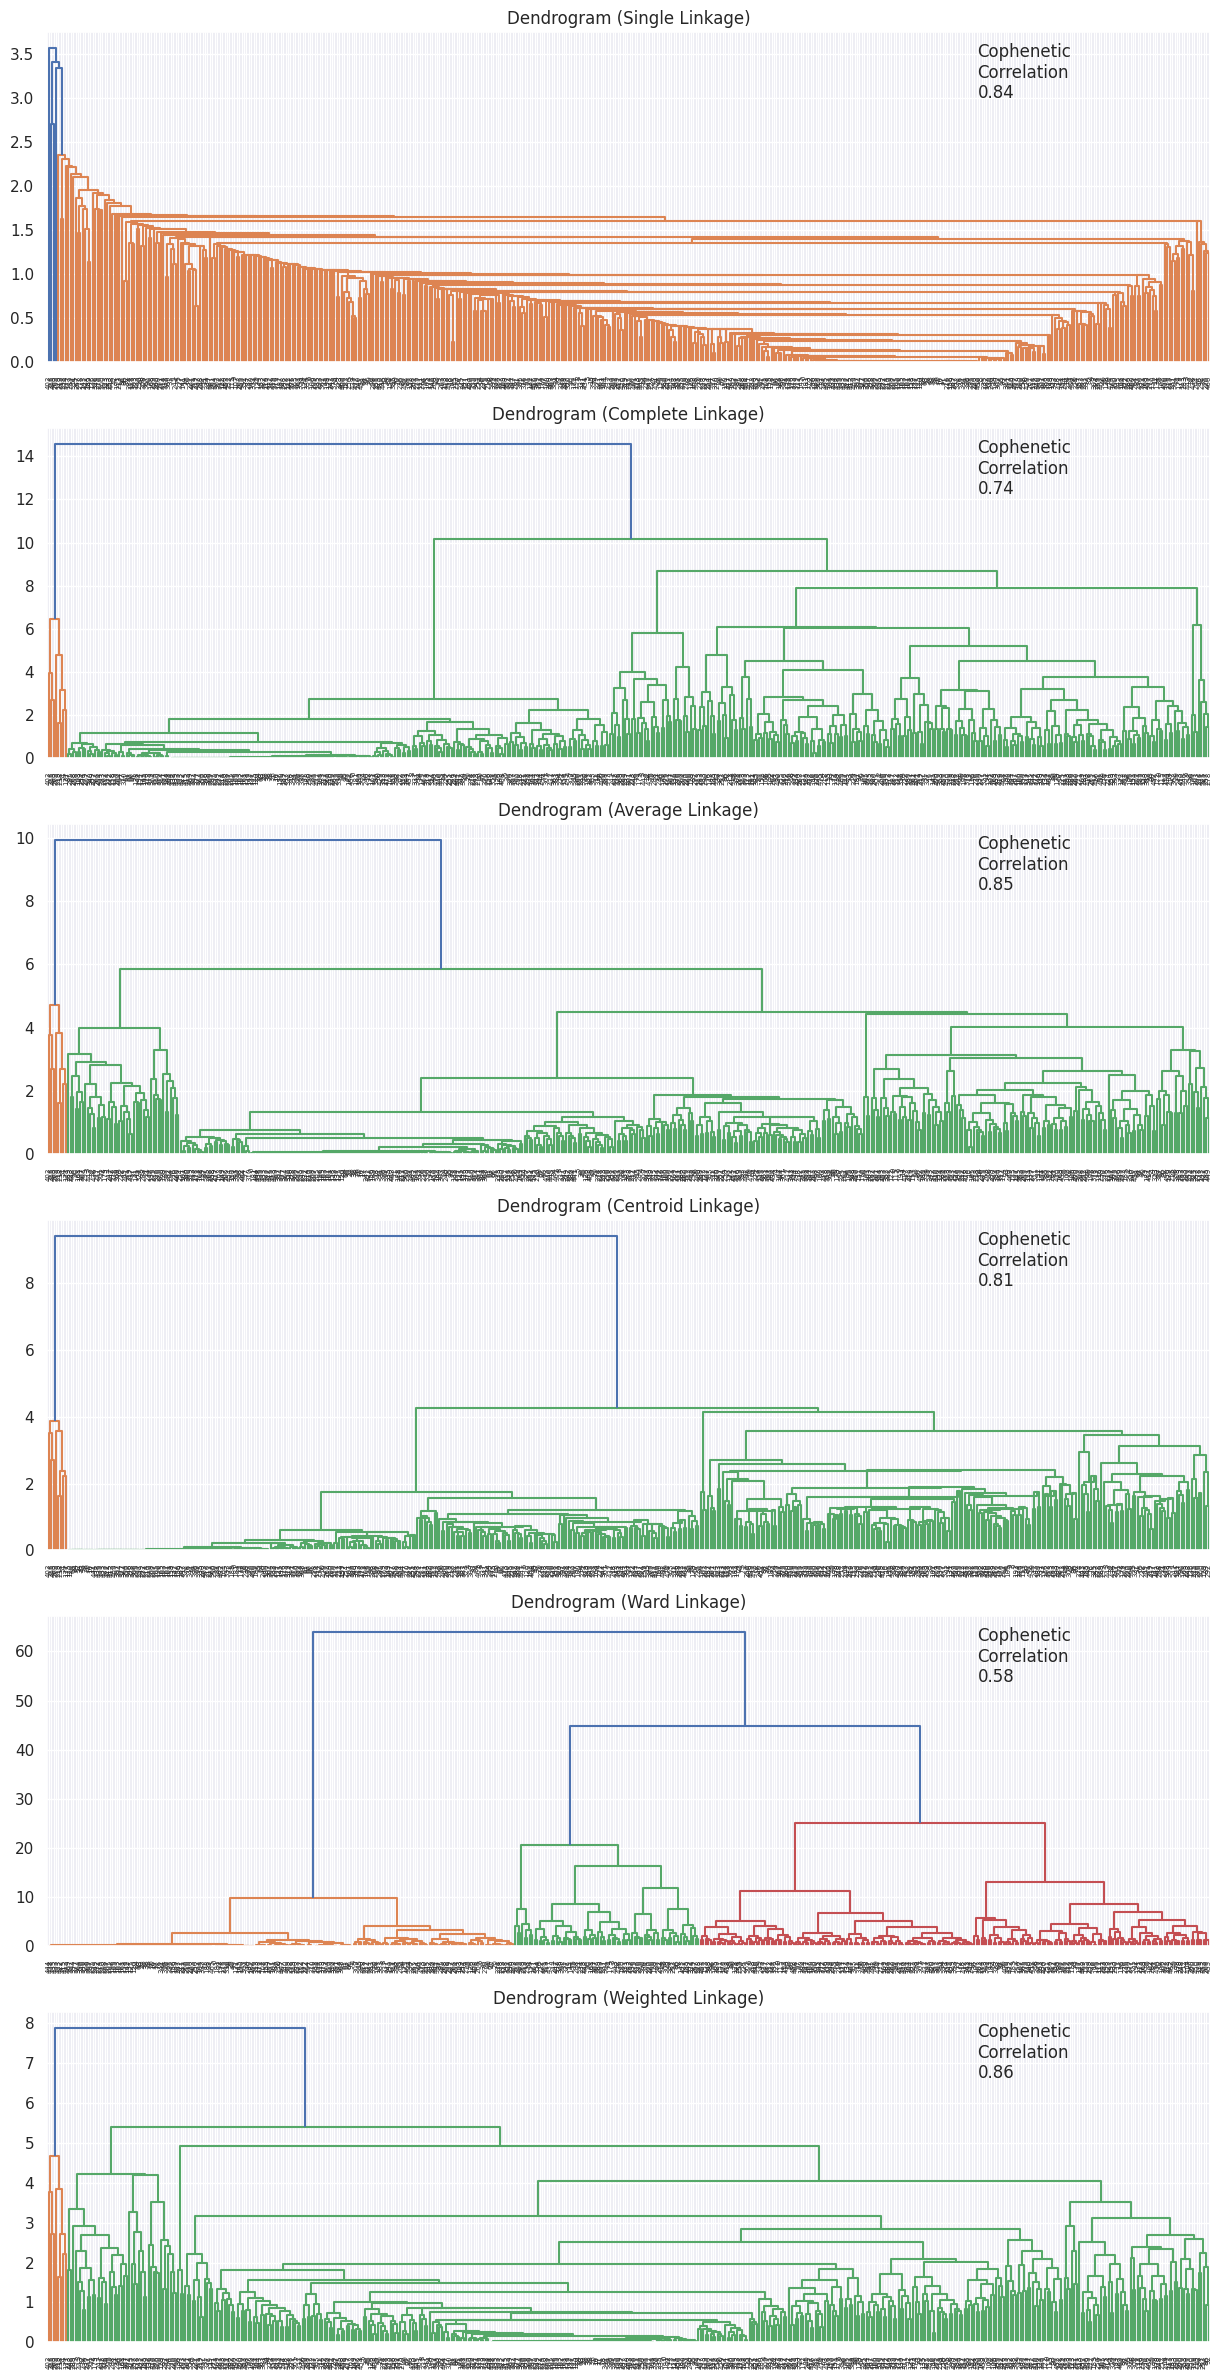

In [ ]:
# Listing linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# Saving results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize = (15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df1, metric = "euclidean", method = method)

    dendrogram(Z, ax = axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
# Creating and printing a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns = compare_cols)
df_cc = df_cc.sort_values(by = "Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.577774
1,complete,0.741204
3,centroid,0.806830
0,single,0.843018
2,average,0.847650
5,weighted,0.862458


In [ ]:
# Creating clustering model with average linkage
HCmodel = AgglomerativeClustering(n_clusters = 4 , metric = 'euclidean' , linkage = 'average' )

HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=4)

In [ ]:
# Creating a copy of the original data
df5 = df.copy()

# Adding hierarchical cluster labels to the Heirarhical and original dataframes
hc_df["HC_segments_L1"] = HCmodel.labels_
df5["HC_segments_L1"] = HCmodel.labels_

df5

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,HC_segments_L1
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7,2
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11,0
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8,2
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Ruben Vinagre,Wolverhampton Wanderers,Defender,0,0,1,172,7,25.3,31.2,0,0,0,0
472,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,0,0,132,3330,51,0.0,763.6,0,12,10,0
473,Vitor Ferreira,Wolverhampton Wanderers,Midfielder,0,1,26,509,8,179.0,80.0,72,0,0,0
474,Willian Jose,Wolverhampton Wanderers,Forward,1,1,40,1106,13,165.9,89.6,256,3,5,0


### **Cluster Profiling**

In [ ]:
# Take the cluster-wise mean of all the variables. Hint: First group 'df3' by cluster labels column and then find mean
hc_profile = df5.groupby(df5['HC_segments_L1']).mean(numeric_only = True)

hc_profile

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
HC_segments_L1,,,,,,,,,,
0,0.881517,1.139810,47.969194,1205.945498,17.580569,148.574408,249.536967,131.753555,3.293839,4.182464
1,16.800000,9.200000,189.000000,3033.200000,44.000000,494.340000,860.720000,1591.600000,21.800000,10.800000
2,8.565217,5.826087,129.391304,2238.934783,29.760870,543.273913,586.234783,861.739130,14.021739,8.739130
3,19.333333,13.000000,238.000000,3101.000000,37.000000,1041.300000,1221.000000,1294.666667,34.000000,12.666667


In [ ]:
# Create the "count_in_each_segment" column in hierarchical cluster profile
hc_profile['Count_of_Segments'] = (df5.groupby(df5['HC_segments_L1'])['Total_Points'].count().values)

hc_profile

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Count_of_Segments
HC_segments_L1,,,,,,,,,,,
0,0.881517,1.139810,47.969194,1205.945498,17.580569,148.574408,249.536967,131.753555,3.293839,4.182464,422
1,16.800000,9.200000,189.000000,3033.200000,44.000000,494.340000,860.720000,1591.600000,21.800000,10.800000,5
2,8.565217,5.826087,129.391304,2238.934783,29.760870,543.273913,586.234783,861.739130,14.021739,8.739130,46
3,19.333333,13.000000,238.000000,3101.000000,37.000000,1041.300000,1221.000000,1294.666667,34.000000,12.666667,3


In [ ]:
# Highlight the maximum average value among all the clusters for each of the variables
hc_profile.style.highlight_max(axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Count_of_Segments
HC_segments_L1,,,,,,,,,,,
0,0.881517,1.139810,47.969194,1205.945498,17.580569,148.574408,249.536967,131.753555,3.293839,4.182464,422
1,16.800000,9.200000,189.000000,3033.200000,44.000000,494.340000,860.720000,1591.600000,21.800000,10.800000,5
2,8.565217,5.826087,129.391304,2238.934783,29.760870,543.273913,586.234783,861.739130,14.021739,8.739130,46
3,19.333333,13.000000,238.000000,3101.000000,37.000000,1041.300000,1221.000000,1294.666667,34.000000,12.666667,3


In [ ]:
# Printing players
for cl in df5['HC_segments_L1'].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df5[df5['HC_segments_L1'] == cl]["Player_Name"].unique())
    print()

In cluster 0, the following players are present:
['Alex Runnarsson' 'Bernd Leno' 'Calum Chambers' 'Cedric Soares'
 'Daniel Ceballos' 'David Luiz' 'Edward Nketiah' 'Emile Smith Rowe'
 'Gabriel Maghalaes' 'Gabriel Teodoro Martinelli Silva' 'Granit Xhaka'
 'Hector Bellerin' 'Kieran Tierney' 'Martin Odegaard' 'Matt Macey'
 'Miguel Azeez' 'Mohamed Naser El Sayed Elneny' 'Pablo Mari'
 'Reiss Nelson' 'Rob Holding' 'Sead Kolasinac' 'Shkodran Mustafi'
 'Sokratis Papastathopoulos' 'Thomas Partey' 'William Saliba'
 'Willian Borges Da Silva' 'Ahmed El Mohamady' 'Carney Chukwuemeka'
 'Conor Hourihane' 'Douglas Luiz Soares de Paulo' 'Emiliano Martinez'
 'Ezri Konsa Ngoyo' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'John McGinn' 'Jose Peleteiro Romallo'
 'Keinan Davis' 'Kortney Hause' 'Mahmoud Ahmed Ibrahim Hassan'
 'Marvelous Nakamba' 'Matt Targett' 'Matthew Cash' 'Morgan Sanson'
 'Orjan Nyland' 'Ross Barkley' 'Tyrone Mings' 'Wesley Moraes'
 'Aaron Connolly' 'Adam Lallana' 'Adam Webst

We see that most of the players have been grouped into one cluster, and there are two very sparse clusters. This clustering does not look good as the clusters do not have enough variability.

We will try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be a good number of clusters from the dendrogram for Ward linkage


In [ ]:
hc_df2 = pca_data.copy()

In [ ]:
# Defining the hierarchical clustering with Ward Linkage
HCmodel = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward' )
HCmodel.fit(hc_df2)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

In [ ]:
# Creating a copy of the original data
df5 = df.copy()

# Adding hierarchical cluster labels to the Heirarhical and original dataframes
hc_df["HC_segments_L2"] = HCmodel.labels_
df5["HC_segments_L2"] = HCmodel.labels_

df5

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,HC_segments_L2
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0,3
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7,0
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11,2
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8,0
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Ruben Vinagre,Wolverhampton Wanderers,Defender,0,0,1,172,7,25.3,31.2,0,0,0,3
472,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,0,0,132,3330,51,0.0,763.6,0,12,10,2
473,Vitor Ferreira,Wolverhampton Wanderers,Midfielder,0,1,26,509,8,179.0,80.0,72,0,0,3
474,Willian Jose,Wolverhampton Wanderers,Forward,1,1,40,1106,13,165.9,89.6,256,3,5,1


### **Cluster Profiling**

In [ ]:
# Taking the cluster-wise mean of all the variables
hc2_profile = df5.groupby(df5['HC_segments_L2']).mean(numeric_only = True)

hc2_profile

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
HC_segments_L2,,,,,,,,,,
0,7.960526,6.342105,135.592105,2467.605263,33.802632,594.343421,638.431579,772.302632,14.736842,9.302632
1,1.357143,1.669643,53.812500,1367.767857,20.866071,186.037500,259.967857,218.866071,3.000000,4.437500
2,1.247423,1.206186,98.453608,2557.814433,35.371134,220.125773,556.723711,185.505155,7.237113,9.721649
3,0.157068,0.251309,10.324607,248.863874,4.094241,31.026702,45.018848,30.785340,0.460733,0.586387


In [ ]:
# Creating the count column for each segment in the hierarchical cluster profile
hc2_profile['Count_of_Segments'] = (df5.groupby(df5['HC_segments_L2'])['Total_Points'].count().values)

hc2_profile

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Count_of_Segments
HC_segments_L2,,,,,,,,,,,
0,7.960526,6.342105,135.592105,2467.605263,33.802632,594.343421,638.431579,772.302632,14.736842,9.302632,76
1,1.357143,1.669643,53.812500,1367.767857,20.866071,186.037500,259.967857,218.866071,3.000000,4.437500,112
2,1.247423,1.206186,98.453608,2557.814433,35.371134,220.125773,556.723711,185.505155,7.237113,9.721649,97
3,0.157068,0.251309,10.324607,248.863874,4.094241,31.026702,45.018848,30.785340,0.460733,0.586387,191


In [ ]:
# Highlight the maximum average value among all the clusters for each of the variables
hc2_profile.style.highlight_max(axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Count_of_Segments
HC_segments_L2,,,,,,,,,,,
0,7.960526,6.342105,135.592105,2467.605263,33.802632,594.343421,638.431579,772.302632,14.736842,9.302632,76
1,1.357143,1.669643,53.812500,1367.767857,20.866071,186.037500,259.967857,218.866071,3.000000,4.437500,112
2,1.247423,1.206186,98.453608,2557.814433,35.371134,220.125773,556.723711,185.505155,7.237113,9.721649,97
3,0.157068,0.251309,10.324607,248.863874,4.094241,31.026702,45.018848,30.785340,0.460733,0.586387,191


In [ ]:
# Printing players in each cluster
for cl in df5['HC_segments_L2'].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df5[df5['HC_segments_L2'] == cl]["Player_Name"].unique())
    print()

In cluster 3, the following players are present:
['Alex Runnarsson' 'Calum Chambers' 'Cedric Soares' 'Edward Nketiah'
 'Martin Odegaard' 'Matt Macey' 'Miguel Azeez' 'Pablo Mari' 'Reiss Nelson'
 'Sead Kolasinac' 'Shkodran Mustafi' 'Sokratis Papastathopoulos'
 'William Saliba' 'Ahmed El Mohamady' 'Carney Chukwuemeka'
 'Conor Hourihane' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Keinan Davis'
 'Kortney Hause' 'Marvelous Nakamba' 'Morgan Sanson' 'Orjan Nyland'
 'Wesley Moraes' 'Alireza Jahanbakhsh' 'Andi Zeqiri'
 'Bernardo Fernandes da Silva Junior' 'Davy Propper' 'Jakub Moder'
 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo' 'Percy Tau'
 'Reda Khadra' 'Tariq Lamptey' 'Anthony Driscoll-Glennon'
 'Bailey Peacock-Farrell' 'Dale Stephens' 'Jimmy Dunne' 'Joel Mumbongo'
 'Josh Benson' 'Kevin Long' 'Lewis Richardson' 'Phil Bardsley'
 'Will Norris' 'Billy Gilmour' 'Emerson Palmieri dos Santos'
 'Faustino Anjorin' 'Fikayo Tomori' 'Karlo Ziger' 'Kepa Arriza

**Plot the boxplot**

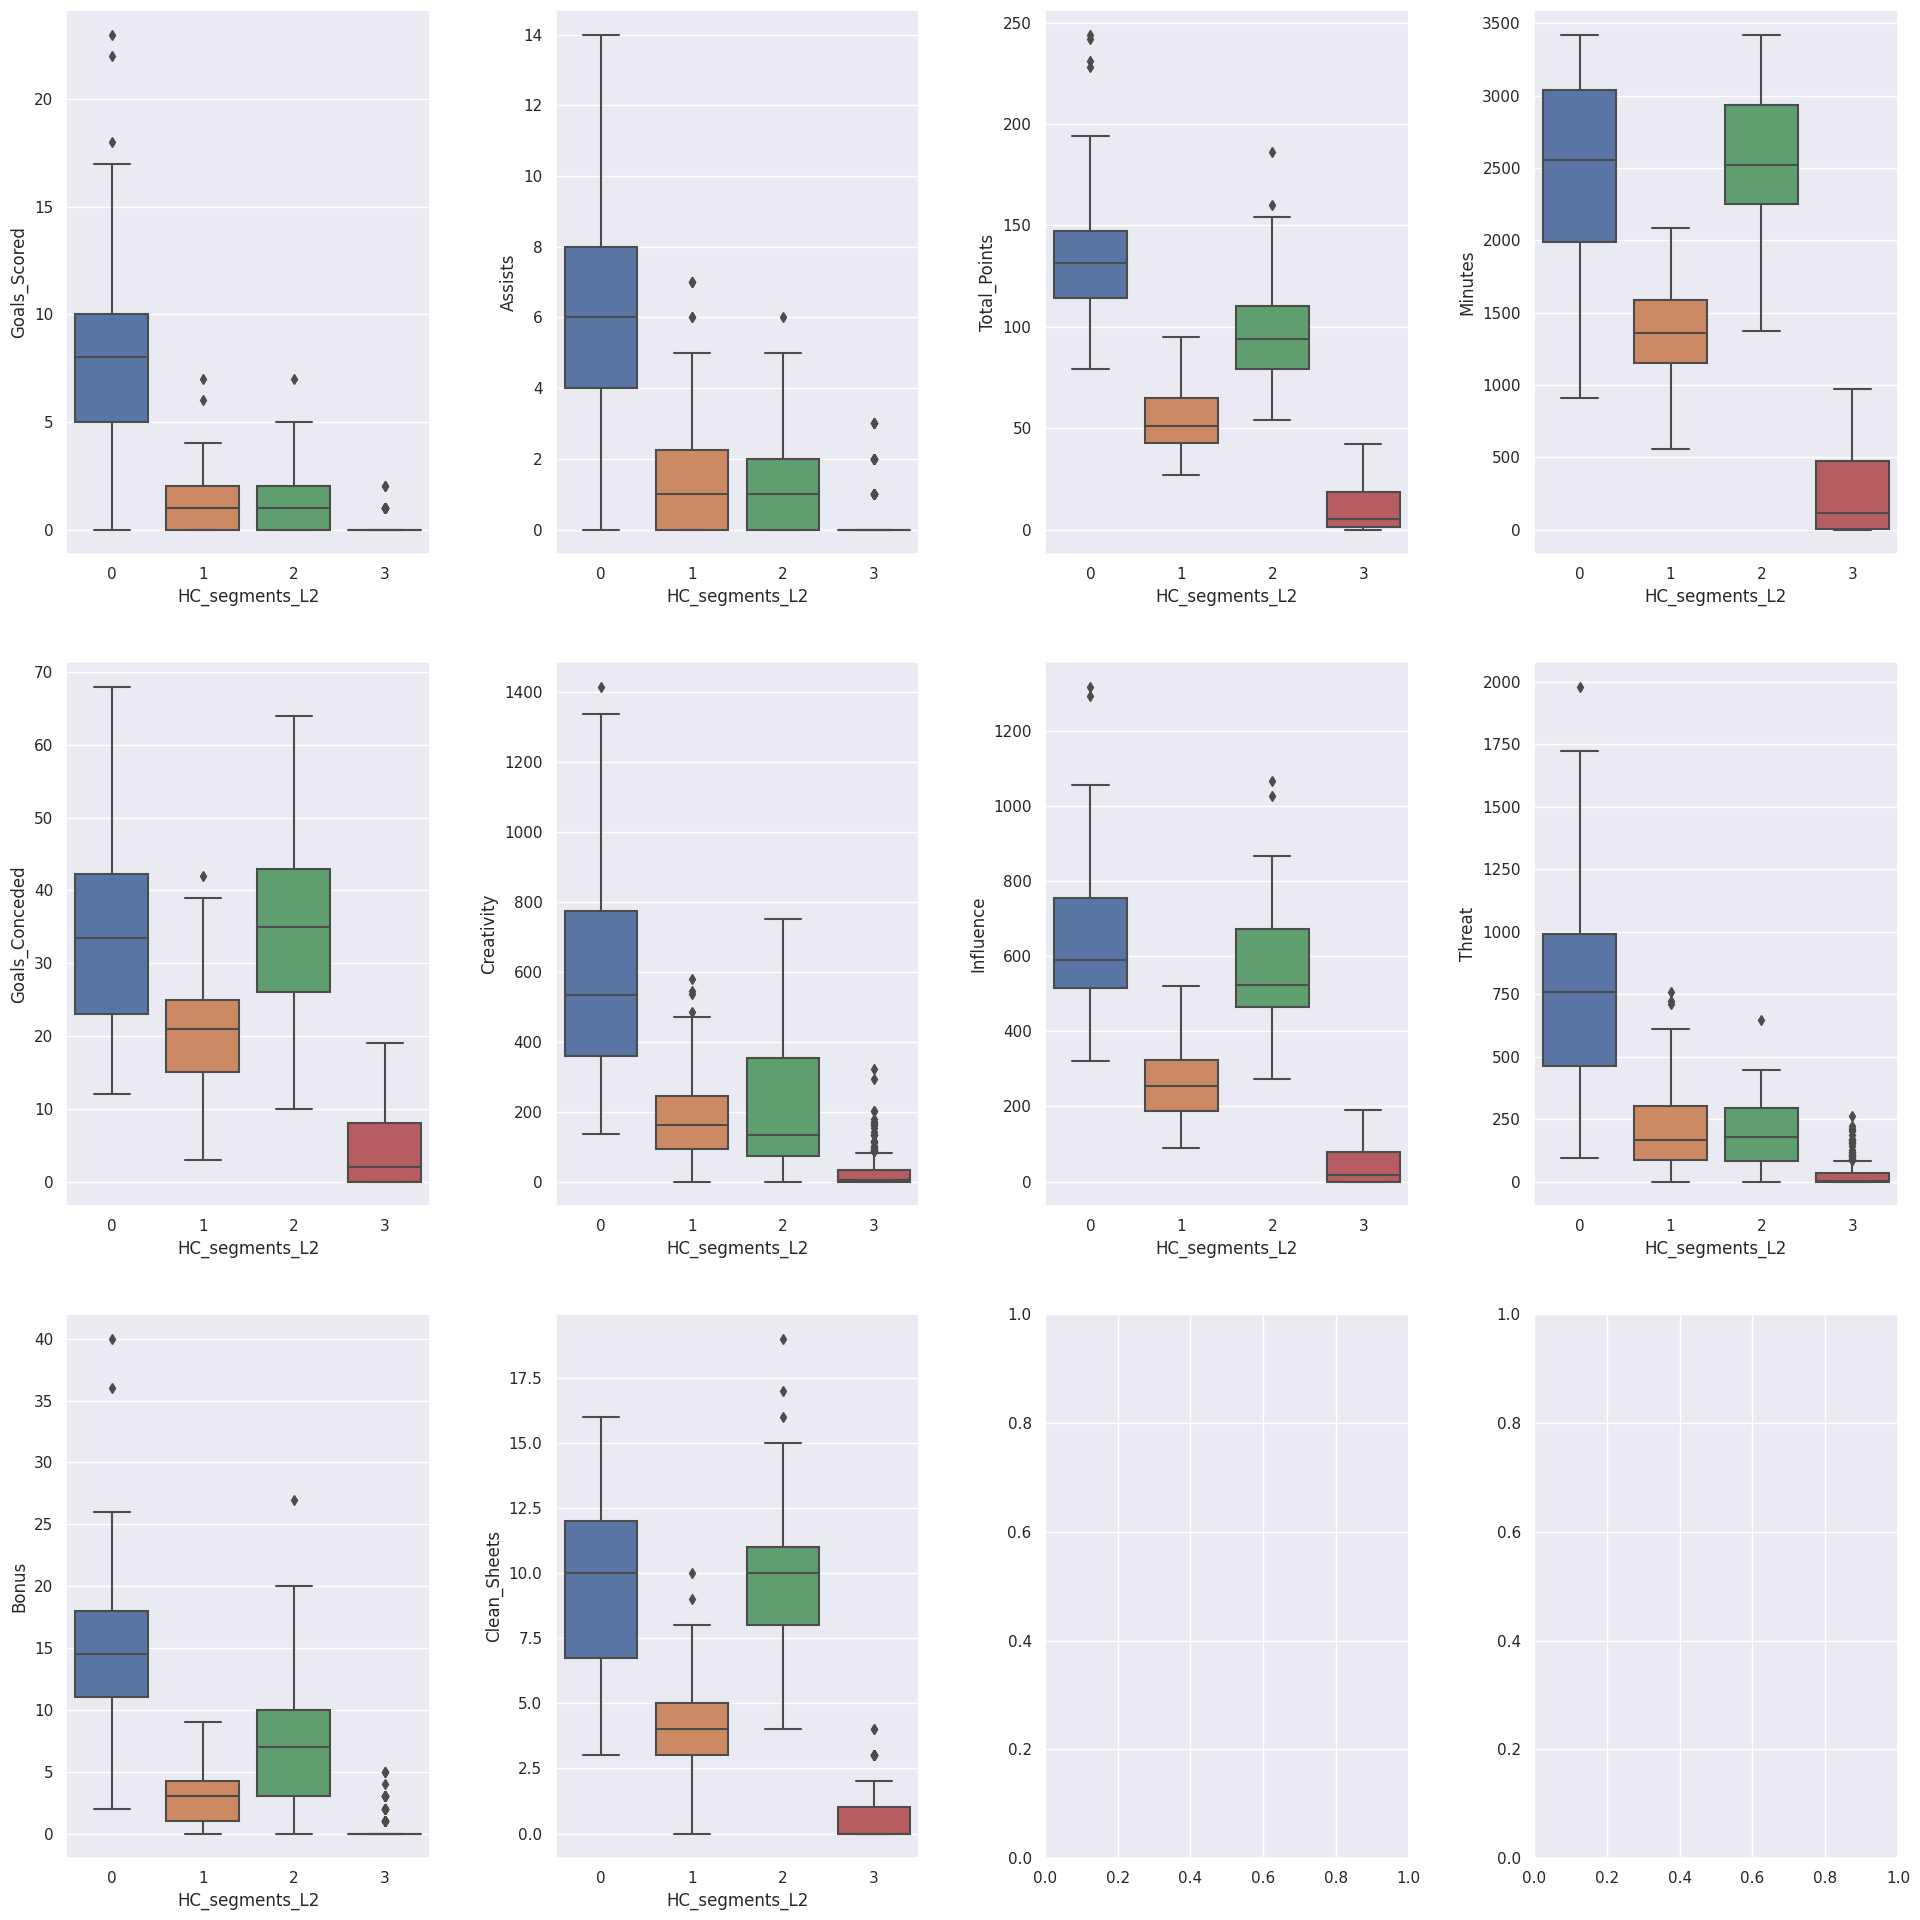

In [ ]:
# Creating boxplot for each of the variables
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for iiii in range(3):
    for jjjj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[iiii][jjjj],
                data = df5,
                y = df5.columns[3 + counter],
                x = "HC_segments_L2",
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

### **Characteristics of each cluster:**
- Cluster 1 appears to favor the offensive players with the best overall performance.
- Cluster 2 appears to contain players are less than average in terms of fantasy points but may fluctuate between offensive and defensive positions.
- Cluster 3 appears to contain the best defensive players, as they have high fantasy points and high Clean_Sheets, but haven't collectively scored or assisted very much. This indicates to me that their impact must be rooted in defensive playmaking.
- Cluster 4 likely contains goalkeepers, as their roles are binary. This would negate many points for things like Bonus or Goals Scored/Assisted.


### **Comparison of cluster profiles from Hierarchical and previous algorithms:**
A hierarchal cluster appears to better categorize dependent variables that are linked through a point system built upon a number of dependent varaibles relating to performance. In the other boxplots, there appeared to be much less uniform distribution between categories where the model found correlation between individual performances and skills, but didn't really factor fantasy points into the final outcome.

This hierarchal cluster, however, found correlation between the independent variables *underlying* what contributes to a player's overall points and categorized them that way, so as to capture the distrbution of points as they pertain to each element of a player's performance.


## **GMM clustering**

In [ ]:
# Copying data for GMM clustering
gmm_df = pca_data.copy()

In [ ]:
# Fitting the Gaussian Mixture algorithm PCA data
gmm = GaussianMixture(n_components = 4, random_state = 1)
gmm.fit(gmm_df)

gmm

GaussianMixture(n_components=4, random_state=1)

### **Cluster Profiling**

In [ ]:
# Creating a copy of the original data
df6 = df.copy()

# Adding gmm cluster labels to the GMM and original dataframes
gmm_df2 = gmm_df.copy()
df6['labels'] = gmm.predict(gmm_df)

df6

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,labels
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0,1
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7,2
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11,0
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8,2
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Ruben Vinagre,Wolverhampton Wanderers,Defender,0,0,1,172,7,25.3,31.2,0,0,0,1
472,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,0,0,132,3330,51,0.0,763.6,0,12,10,0
473,Vitor Ferreira,Wolverhampton Wanderers,Midfielder,0,1,26,509,8,179.0,80.0,72,0,0,3
474,Willian Jose,Wolverhampton Wanderers,Forward,1,1,40,1106,13,165.9,89.6,256,3,5,3


In [ ]:
# Taking the cluster-wise mean of all the variables
gmm_profile = df6.groupby('labels').mean()

gmm_profile

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
labels,,,,,,,,,,
0,1.189655,1.344828,94.439655,2453.189655,33.793103,221.881897,535.862069,174.991379,6.793103,9.431034
1,0.000000,0.000000,3.547619,107.436508,2.055556,8.590476,15.739683,5.746032,0.000000,0.182540
2,6.552381,5.390476,114.876190,2104.809524,29.619048,501.710476,521.451429,683.466667,11.904762,7.685714
3,0.635659,0.868217,34.031008,908.968992,14.186047,106.855039,165.444961,110.813953,1.612403,2.596899


In [ ]:
# Creating the count column in gmm cluster profile
gmm_profile['count'] = df6.groupby('labels')['Total_Points'].count().values

gmm_profile

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,1.189655,1.344828,94.439655,2453.189655,33.793103,221.881897,535.862069,174.991379,6.793103,9.431034,116
1,0.000000,0.000000,3.547619,107.436508,2.055556,8.590476,15.739683,5.746032,0.000000,0.182540,126
2,6.552381,5.390476,114.876190,2104.809524,29.619048,501.710476,521.451429,683.466667,11.904762,7.685714,105
3,0.635659,0.868217,34.031008,908.968992,14.186047,106.855039,165.444961,110.813953,1.612403,2.596899,129


In [ ]:
# Highlighting the maximum average value among all the clusters for each of the variables
gmm_profile.style.highlight_max(axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,1.189655,1.344828,94.439655,2453.189655,33.793103,221.881897,535.862069,174.991379,6.793103,9.431034,116
1,0.000000,0.000000,3.547619,107.436508,2.055556,8.590476,15.739683,5.746032,0.000000,0.182540,126
2,6.552381,5.390476,114.876190,2104.809524,29.619048,501.710476,521.451429,683.466667,11.904762,7.685714,105
3,0.635659,0.868217,34.031008,908.968992,14.186047,106.855039,165.444961,110.813953,1.612403,2.596899,129


In [ ]:
# Completing the code to print the players in each cluster
for cl in df6['labels'].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df6[df6['labels'] == cl]["Player_Name"].unique())
    print()

In cluster 1, the following players are present:
['Alex Runnarsson' 'Matt Macey' 'Miguel Azeez' 'Reiss Nelson'
 'Sead Kolasinac' 'Shkodran Mustafi' 'Sokratis Papastathopoulos'
 'William Saliba' 'Carney Chukwuemeka' 'Henri Lansbury'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Morgan Sanson'
 'Orjan Nyland' 'Wesley Moraes' 'Bernardo Fernandes da Silva Junior'
 'Davy Propper' 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo'
 'Reda Khadra' 'Anthony Driscoll-Glennon' 'Bailey Peacock-Farrell'
 'Dale Stephens' 'Joel Mumbongo' 'Josh Benson' 'Lewis Richardson'
 'Phil Bardsley' 'Will Norris' 'Billy Gilmour'
 'Emerson Palmieri dos Santos' 'Faustino Anjorin' 'Fikayo Tomori'
 'Karlo Ziger' 'Valentino Livramento' 'Willy Caballero' 'Connor Wickham'
 'Jack Butland' 'James McCarthy' 'Mamadou Sakho' 'Martin Kelly'
 'Nathan Ferguson' 'Reece Hannam' 'Ryan Inniss' 'Sam Woods'
 'Stephen Henderson' 'Anthony Gordon' 'Cenk Tosun' 'Fabian Delph'
 'Joao Virginia' 'Jonjoe Kenny' 'Joshua King' 'Moise Kean'

**Plot the boxplot**

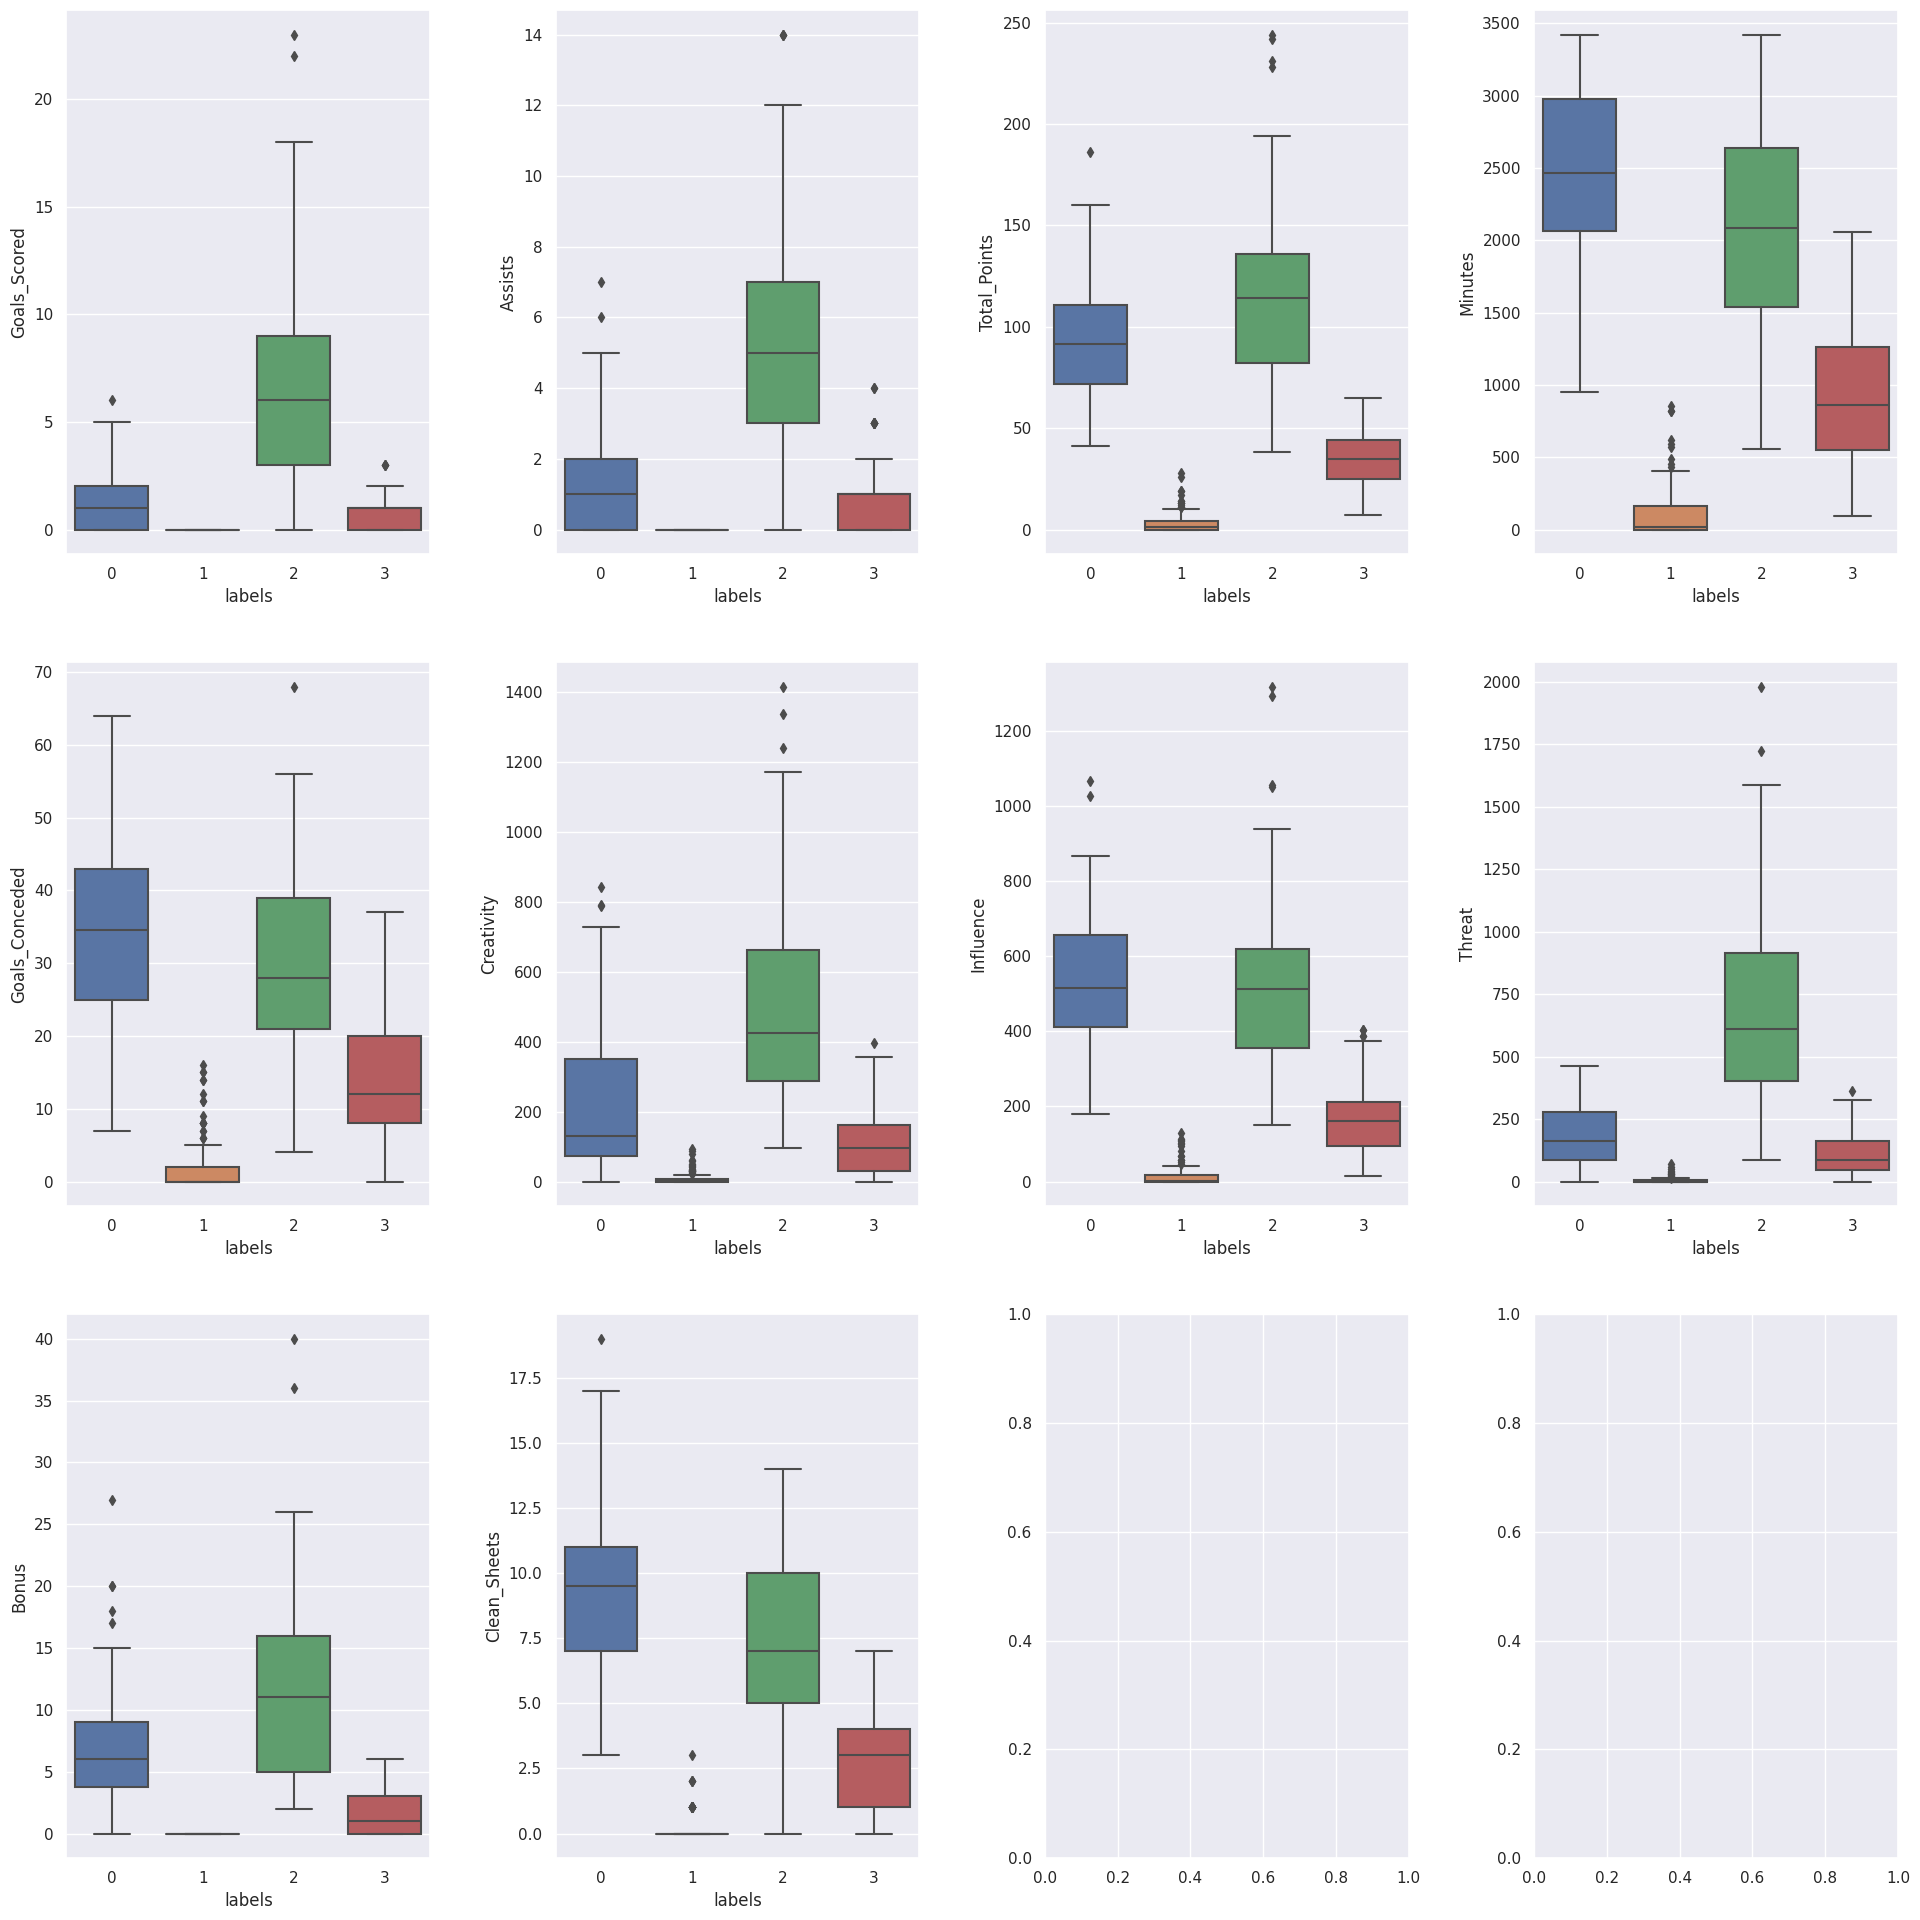

In [ ]:
# Creating boxplot for each of the variables
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for iiiii in range(3):
    for jjjjj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[iiiii][jjjjj],
                data = df6,
                y = df6.columns[3 + counter],
                x = "labels",
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

### **Characteristics of each cluster:**
It is hard to tell what relationship links these clusters. While the data appears to be evenly distributed, the correlation isn't necessarily clear because some variables that have been proven by other methods to be positively correlated aren't correlated in this series of plots.

### **Comparison of cluster profiles from GMM and previous algorithms:**
It is notable that, compared to other methods, this plot has a substantial amount of outliers, further supporting the idea that this likely isn't the best way to model this data. This is especially true because there doesn't appear to be a clear categorization by player performance, which is indicated by the way outliers may have influenced overall points.

## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

### **What is the silhouette score?**

Silhouette score is one of the methods for evaluating the quality of clusters created using clustering algorithms such as K-Means. The silhouette score is a measure of how similar an object is to its cluster (cohesion) compared to other clusters (separation). Silhouette score has a range of [-1, 1].

* Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters.
* Silhouette score near -1 indicates that those samples might have been assigned to the wrong cluster.

In [ ]:
# Copying data frames
dbscan_df = pca_data.copy()
dbscan_df1 = dbscan_df.copy()

In [ ]:
# Initializing lists
eps_value = [2,3]                       # Taking random eps value
min_sample_values = [6,20]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}

In [ ]:
# Finding the silhouette_score for each of the combination
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps = i, min_samples = j).fit(dbscan_df)          # Applying DBScan to each of the combinations in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(dbscan_df, labels)           # Finding silhouette score
        print(
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                            # Printing the silhouette score for each of the combinations
        )
        if high_silhouette_avg < silhouette_avg:                       # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =6 The average silhoutte_score is : 0.528300891282389
For eps value =2 For min sample =20 The average silhoutte_score is : 0.3647818751696758
For eps value =3 For min sample =6 The average silhoutte_score is : 0.624205189855851
For eps value =3 For min sample =20 The average silhoutte_score is : 0.6188492416303977


In [ ]:
# Printing the highest silhouette score
print(
    "Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(
        high_silhouette_avg, high_i_j[0], high_i_j[1]
    )
)

Highest_silhoutte_avg is 0 for eps = 3 and min sample = 20


In [ ]:
# Applying DBSCAN with the hyperparmeter values that we got
db_model = DBSCAN(eps = i, min_samples = j)

# Fitting DBSCAN algorithm with the above hyperparameter values
db_model = db_model.fit(dbscan_df1)

In [ ]:
# Creating a copy of the original data
df7 = df.copy()

# Add DBSCAN cluster labels to dbscan data
dbscan_df1["db_segments"] = db_model.labels_

# Add DBSCAN cluster labels to original data
df7["db_segments"] = db_model.labels_

df7

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,db_segments
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7,0
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11,0
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8,0
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Ruben Vinagre,Wolverhampton Wanderers,Defender,0,0,1,172,7,25.3,31.2,0,0,0,0
472,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,0,0,132,3330,51,0.0,763.6,0,12,10,0
473,Vitor Ferreira,Wolverhampton Wanderers,Midfielder,0,1,26,509,8,179.0,80.0,72,0,0,0
474,Willian Jose,Wolverhampton Wanderers,Forward,1,1,40,1106,13,165.9,89.6,256,3,5,0


### **Cluster Profiling**

In [ ]:
# Taking the cluster-wise mean of all the variables
db_profile = df7.groupby('db_segments').mean()

db_profile

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
db_segments,,,,,,,,,,
-1,18.666667,11.666667,221.000000,3045.000000,41.000000,779.533333,1067.566667,1447.000000,28.666667,11.166667
0,1.693617,1.625532,56.442553,1315.104255,18.878723,188.526383,284.750213,209.361702,4.412766,4.663830


### **Choosing the Best Algorithm**

In [ ]:
# Finding the best algorithm

models = [kmeans, kmed, HCmodel, gmm]

for i in models:
  try:
    score = silhouette_score(pca_data, i.predict(pca_data))
  except:
    score = silhouette_score(pca_data, i.labels_)
  print(f"The {i} model's score is {score}.")

The KMeans(n_clusters=4, n_init='auto', random_state=1) model's score is 0.4041109262771501.
The KMedoids(n_clusters=4, random_state=1) model's score is 0.3938224989846948.
The AgglomerativeClustering(metric='euclidean', n_clusters=4) model's score is 0.38497099800605145.
The GaussianMixture(n_components=4, random_state=1) model's score is 0.2849464415241945.


## **Conclusion:**
Based on this analysis, the best algorithm to use for categorizing player performance would be k-means, though I would argue that kmeds would be the best course of action, given the statistical validation of the centroid in k-medoids.

From a predictive analytics perspective, I think it would be better for the model to be able to make adjustments that aren't as sensitive to outlier data, nor as dependent on the human ability to make an educated guess.

### **To HTML:**

In [ ]:
!jupyter nbconvert --to html Unsupervised_Learning_Project.ipynb

[NbConvertApp] WARNING | pattern 'Unsupervised_Learning_Project.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=T